# Conclusions
- Pruned Classification Tree with all variables gives good accuracy and is highly explainable
- Best performing model is a pruned tree with PCA but this loses explainability
- Small number of records leads to overfitting for ensemble approaches, even with only 4 variables

# Data Exploration

In [1]:
#Bankruptcy Case
bankrupt.df <- read.csv("Bankruptcy.csv", header = TRUE)  # load Bankruptcy.csv
str(bankrupt.df) # get a sense of the columns of data
table(is.na(bankrupt.df))  # check for NAs and NaNs

'data.frame':	132 obs. of  27 variables:
 $ NO : int  1 2 3 4 5 6 7 8 9 10 ...
 $ D  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ YR : int  78 77 72 80 81 70 76 77 73 71 ...
 $ R1 : num  0.23 0.19 0.07 0.07 0.09 0.24 0.08 0.1 0.16 0.16 ...
 $ R2 : num  0.08 0.07 0.02 0.03 0.02 0.07 0.04 0.02 0.09 0.08 ...
 $ R3 : num  0.02 0.09 0.03 0.04 0.03 0.14 0.02 0.02 0.07 0.06 ...
 $ R4 : num  0.03 0.12 0.05 0.04 0.04 0.22 0.03 0.04 0.1 0.08 ...
 $ R5 : num  0.46 0.02 0.06 0.04 0.06 0.1 0.3 -0.05 0.1 0.03 ...
 $ R6 : num  0.12 0.02 0.1 0.06 0.08 0.18 0.13 -0.06 0.08 0.02 ...
 $ R7 : num  0.19 0.03 0.14 0.06 0.11 0.29 0.21 -0.09 0.11 0.03 ...
 $ R8 : num  10.36 3.13 2.41 5.55 2.85 ...
 $ R9 : num  1.17 1.73 1.36 1.13 1.88 1.37 0.82 1.17 1.64 1.58 ...
 $ R10: num  0.4 0.6 0.41 0.44 0.42 0.43 0.42 0.24 0.91 0.75 ...
 $ R11: num  0.1 0.78 0.66 0.58 0.62 0.79 0.18 0.27 0.72 0.55 ...
 $ R12: num  0.14 0.63 0.7 0.57 0.46 0.92 0.36 0.37 0.62 0.47 ...
 $ R13: num  0.13 0.05 -0.01 -0.02 0.01 0.03 0.03 -0.07 0.04 0.0


FALSE 
 3564 

In [2]:
# Thought: D is the decision variables (bankrupt yes/no)
# Thought: only 132 records, but well balanced (66 bankrupt, 66 healthy firms)
# Thought: will probably want to normalize the variables as some have larger ranges relative to others
# Thought: no NAs or NaNs (missing tems/numbers)
# Thought: have to get rid of column NO (just an identifier)
# Thought: while the year variable may tell us something related to the economic cycle, it is less fincnial than R1-R24, and may need to be stripped.

#Checking out the data
dim(bankrupt.df)  # find the dimension of data frame
head(bankrupt.df)  # take a peak at the first six rows
colnames(bankrupt.df) # print column names
summary(bankrupt.df) #get descriptive statistics of column variables

[1] 132  27

NO,D,YR,R1,R2,R3,R4,R5,R6,R7,⋯,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,⋯,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,⋯,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,⋯,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,⋯,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,⋯,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
6,0,70,0.24,0.07,0.14,0.22,0.10,0.18,0.29,⋯,0.10,0.06,0.11,0.18,9.82,1.82,1.60,0.06,0.11,0.18


[1] "NO"  "D"   "YR"  "R1"  "R2"  "R3"  "R4"  "R5"  "R6"  "R7"  "R8"  "R9" 
[13] "R10" "R11" "R12" "R13" "R14" "R15" "R16" "R17" "R18" "R19" "R20" "R21"
[25] "R22" "R23" "R24"

       NO               D             YR              R1        
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :0.0000  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:0.0700  
 Median : 66.50   Median :0.5   Median :74.00   Median :0.1500  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   :0.2917  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:0.2725  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   :4.9200  
       R2                R3                R4               R5          
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :-1.40000  
 1st Qu.:0.02000   1st Qu.:0.03000   1st Qu.:0.0400   1st Qu.: 0.01000  
 Median :0.03000   Median :0.05000   Median :0.0800   Median : 0.03000  
 Mean   :0.06136   Mean   :0.07379   Mean   :0.1558   Mean   : 0.04152  
 3rd Qu.:0.06000   3rd Qu.:0.09000   3rd Qu.:0.1725   3rd Qu.: 0.08000  
 Max.   :1.00000   Max.   :0.64000   Max.   :1.3800   Max.   : 0.46000  
       R6                 R7      

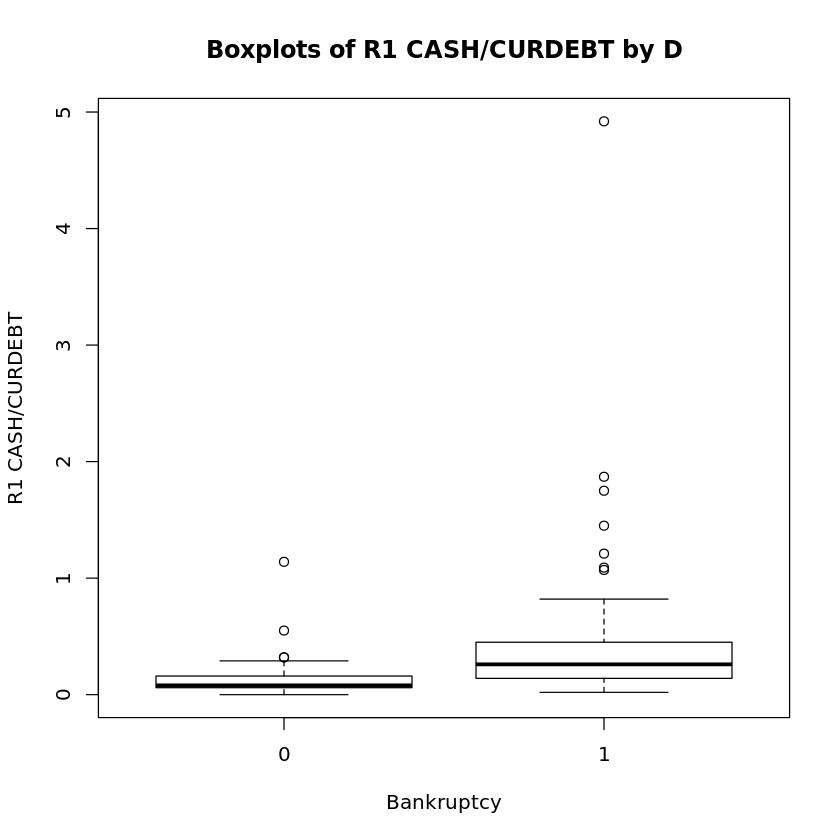

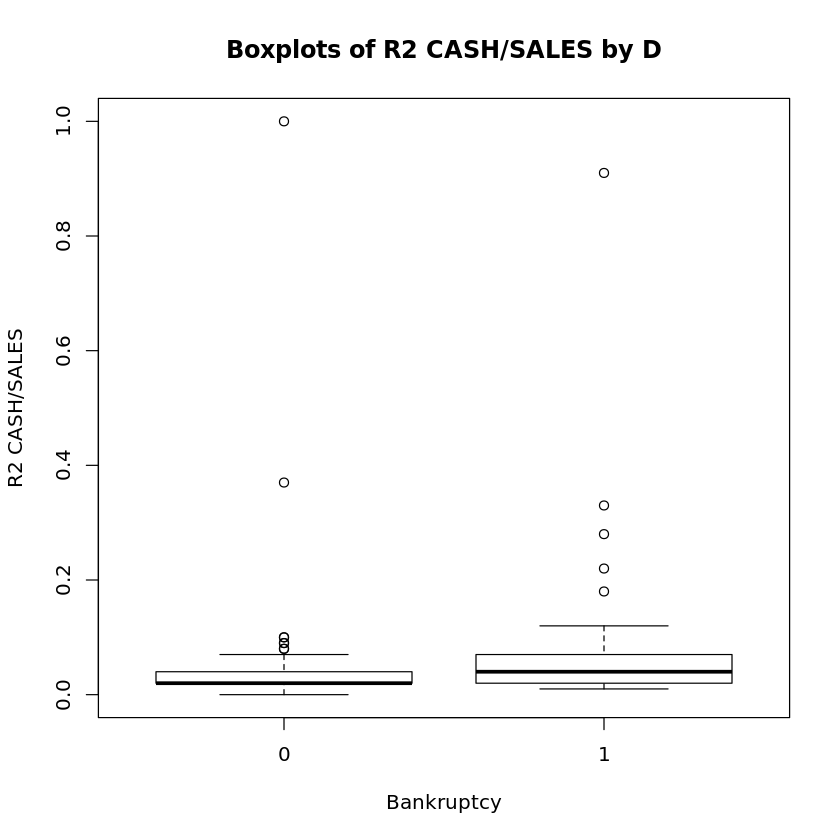

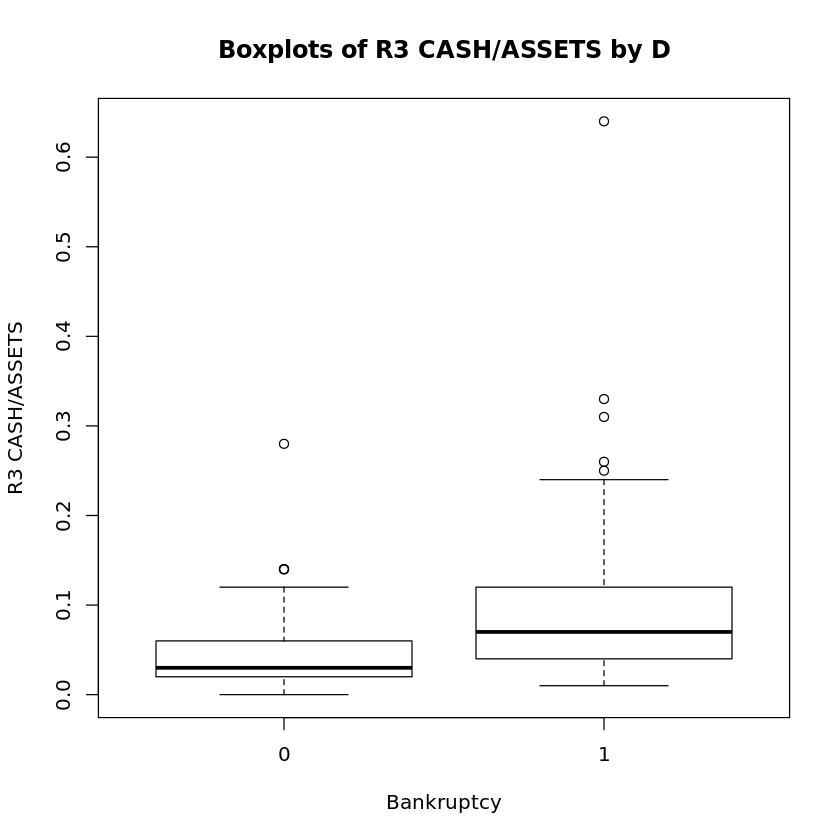

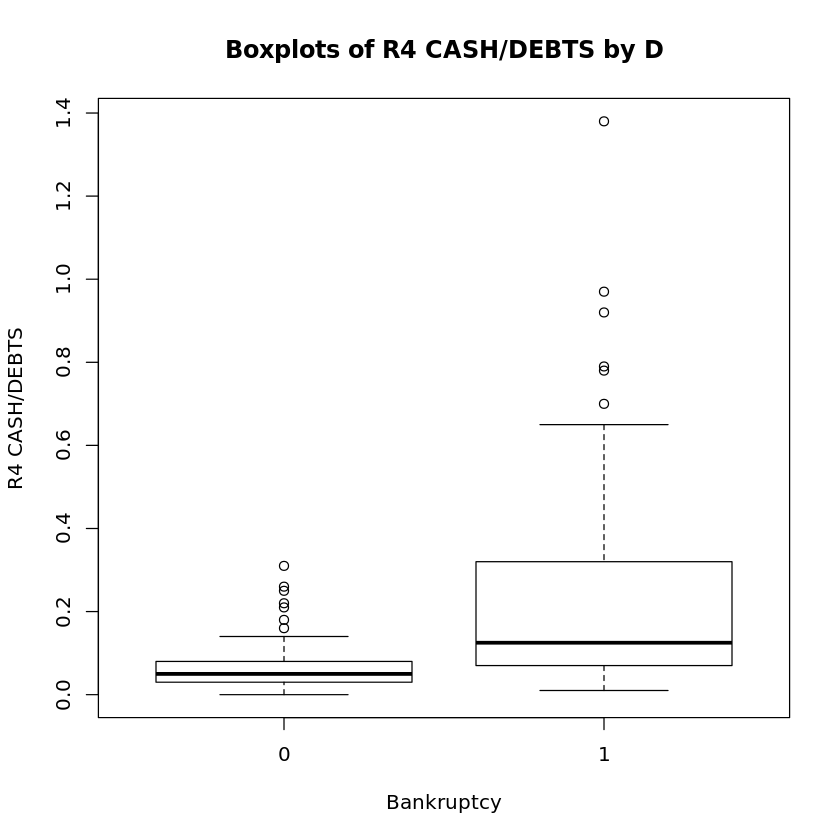

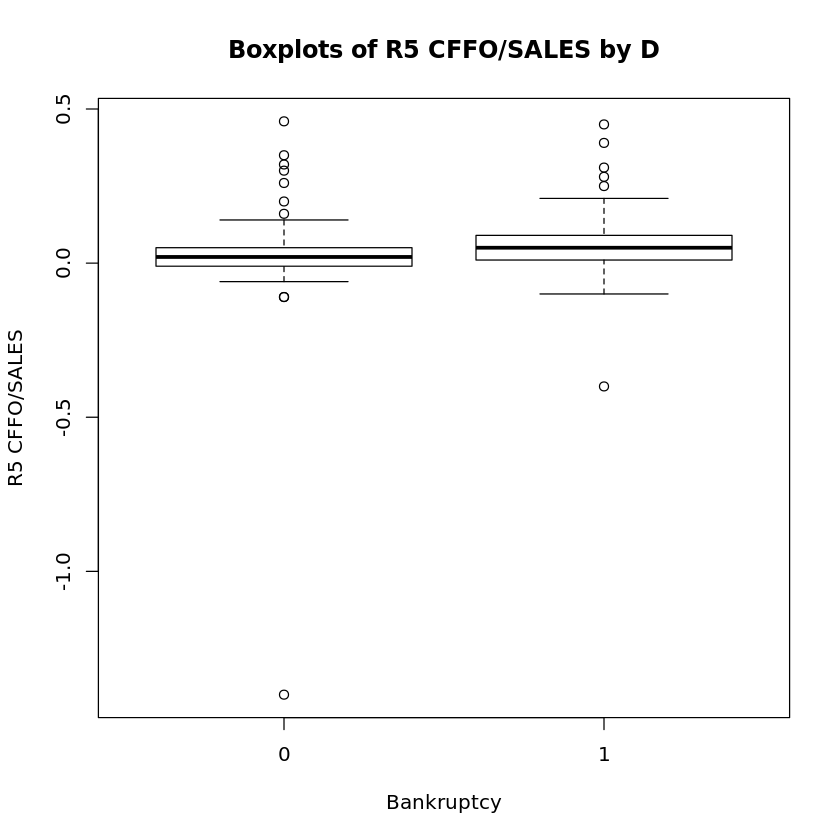

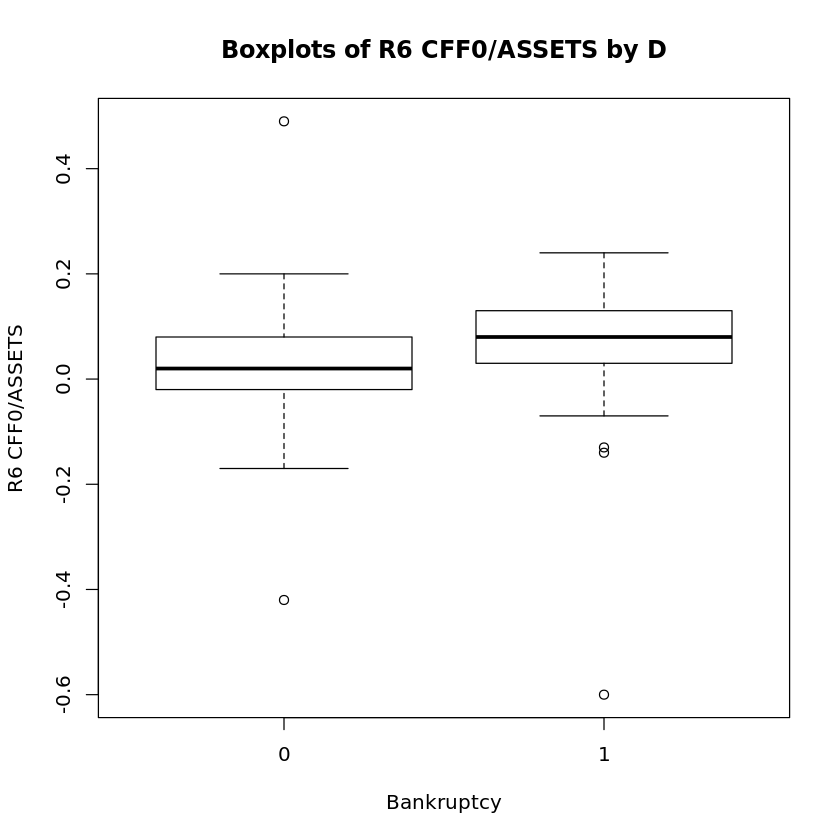

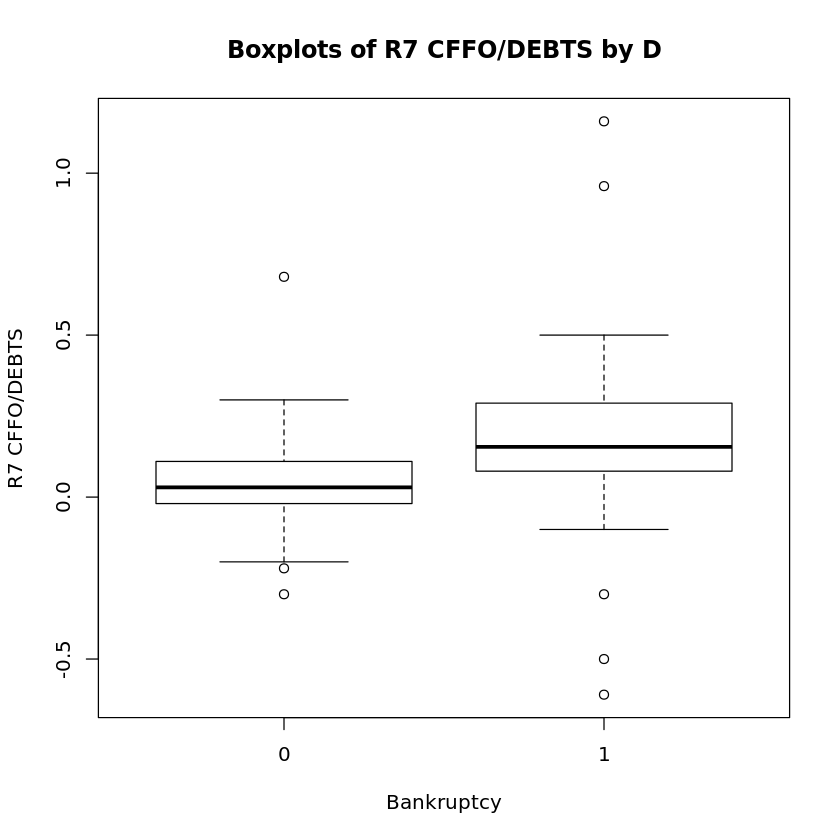

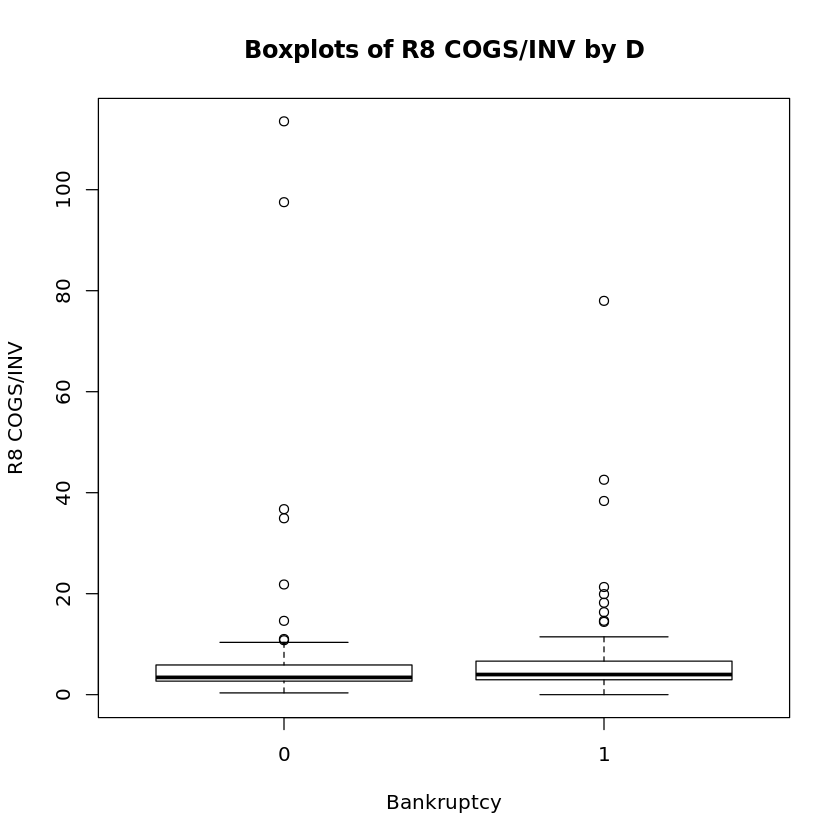

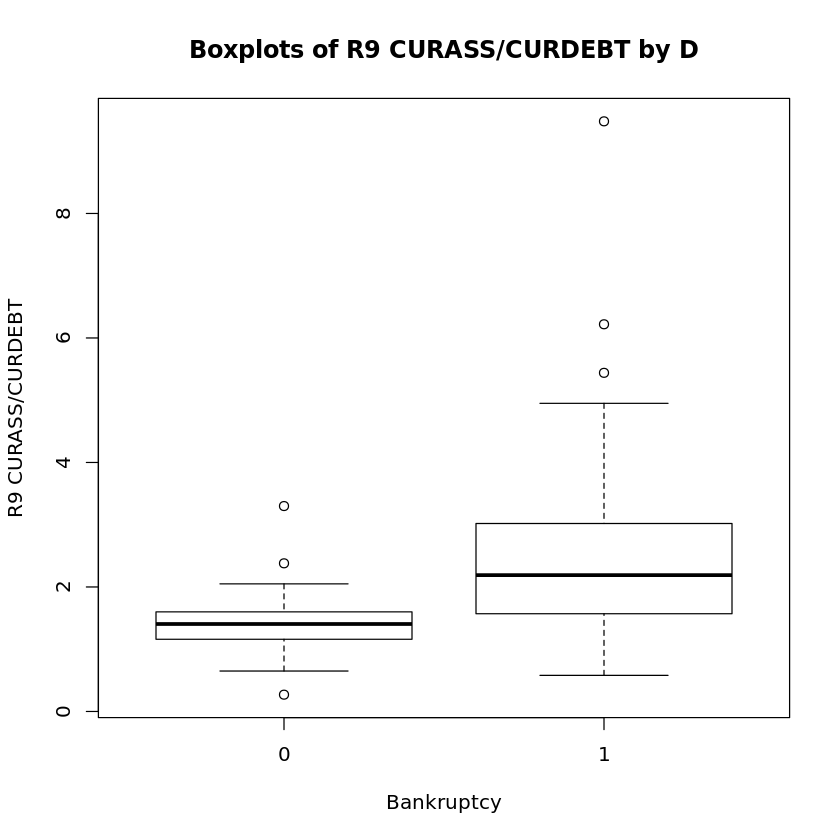

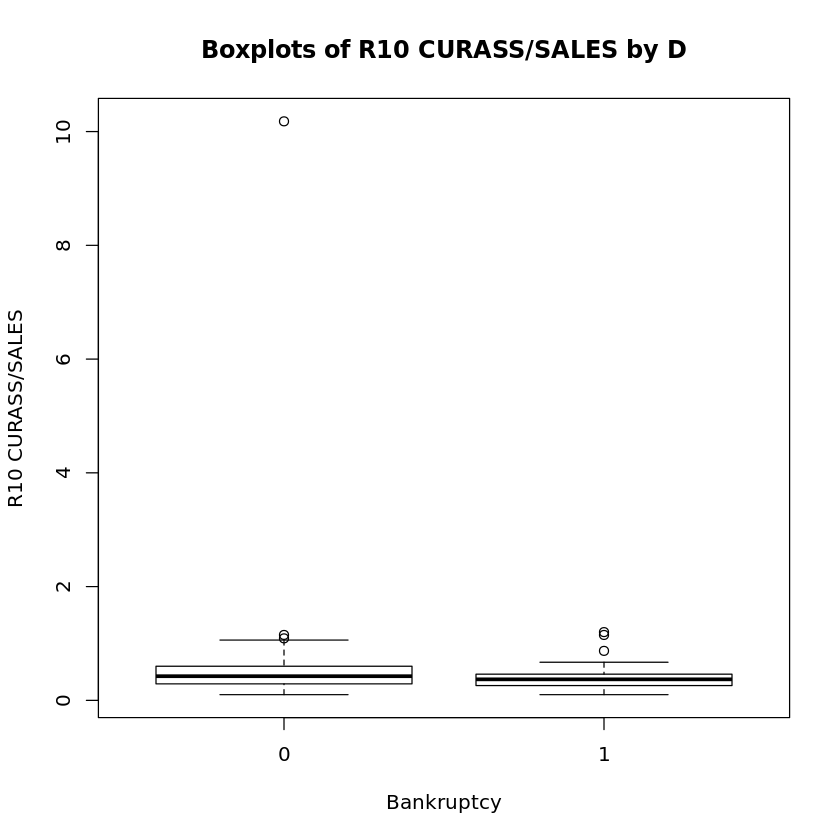

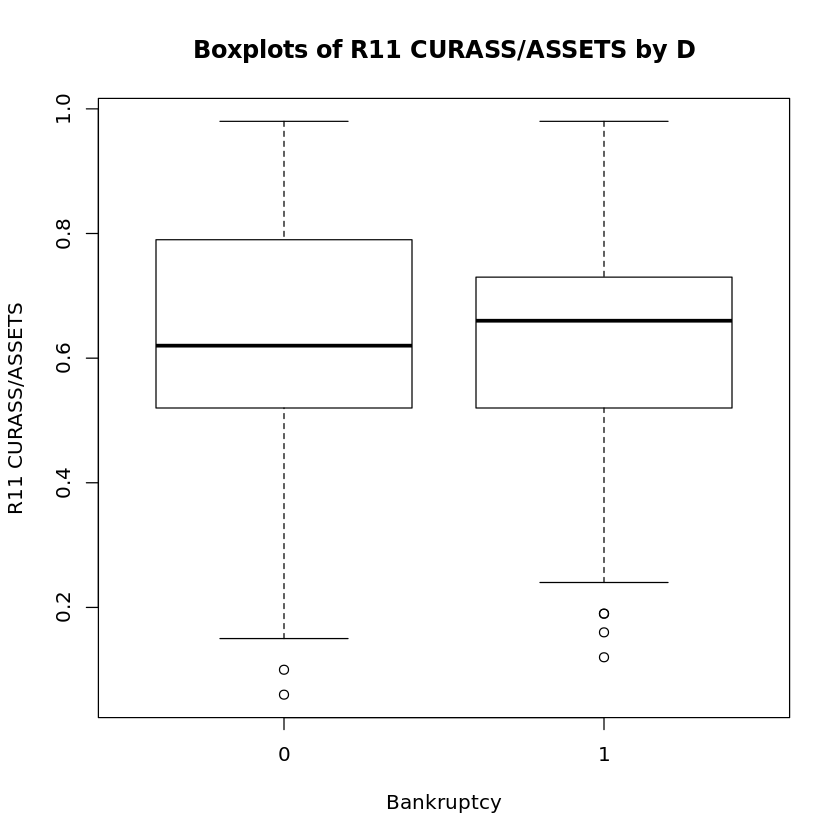

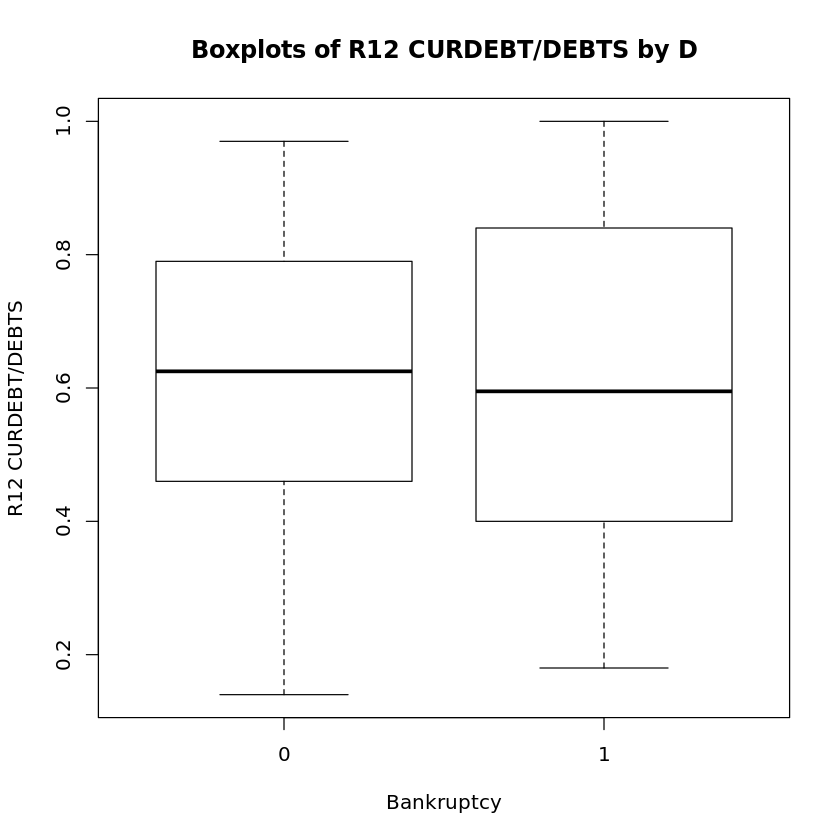

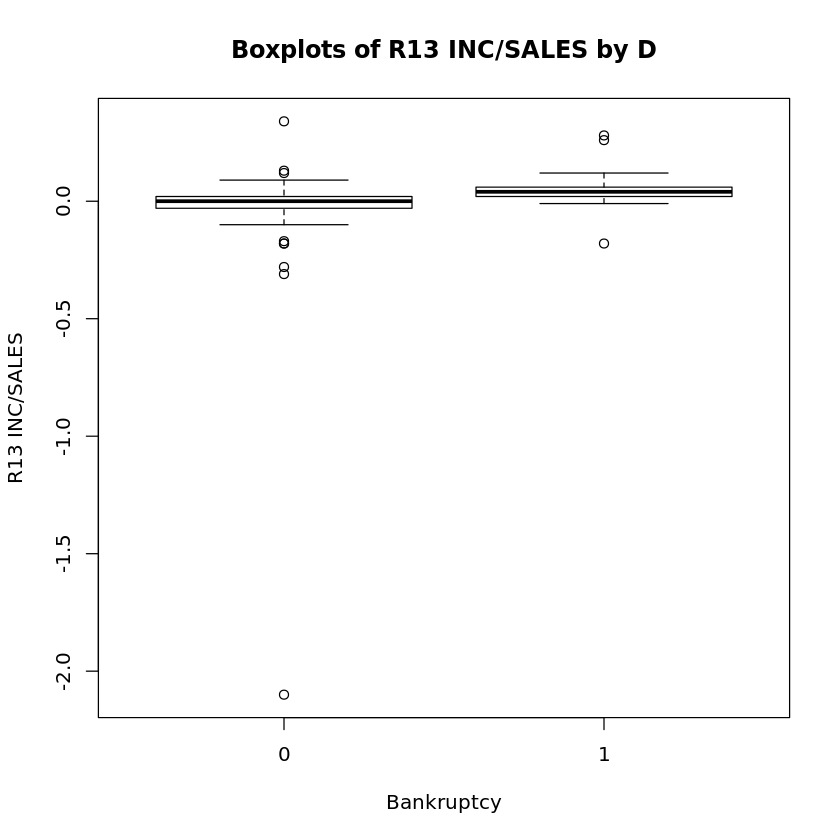

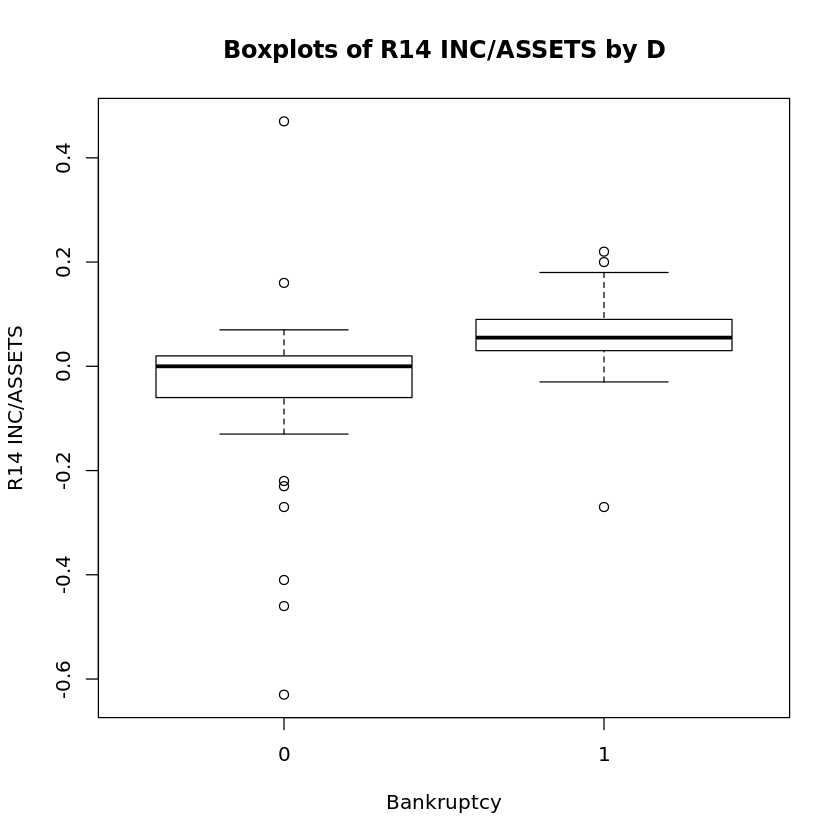

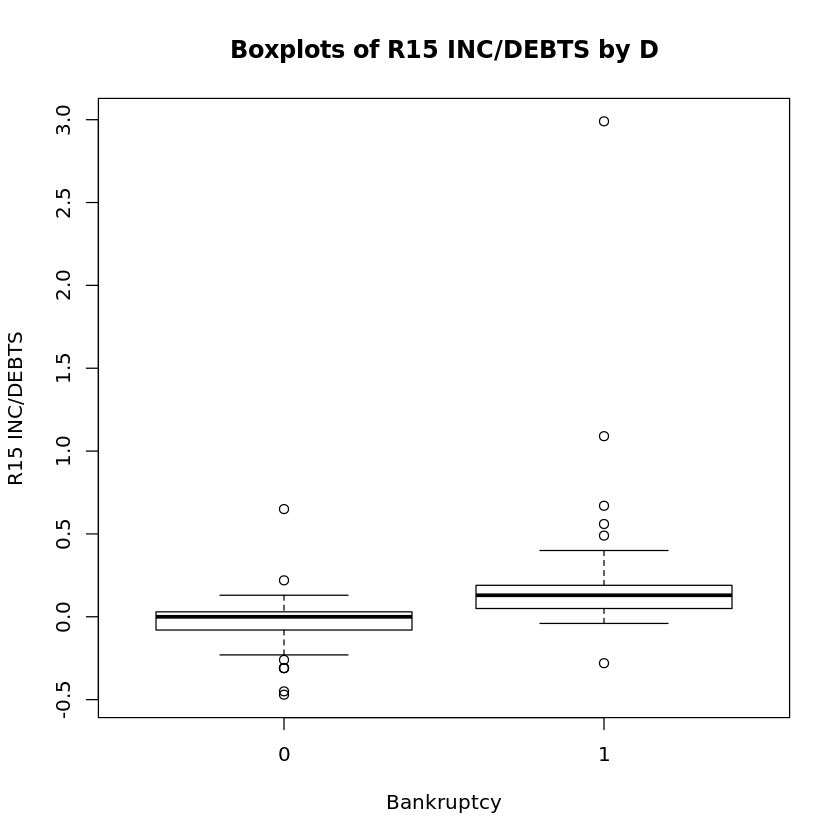

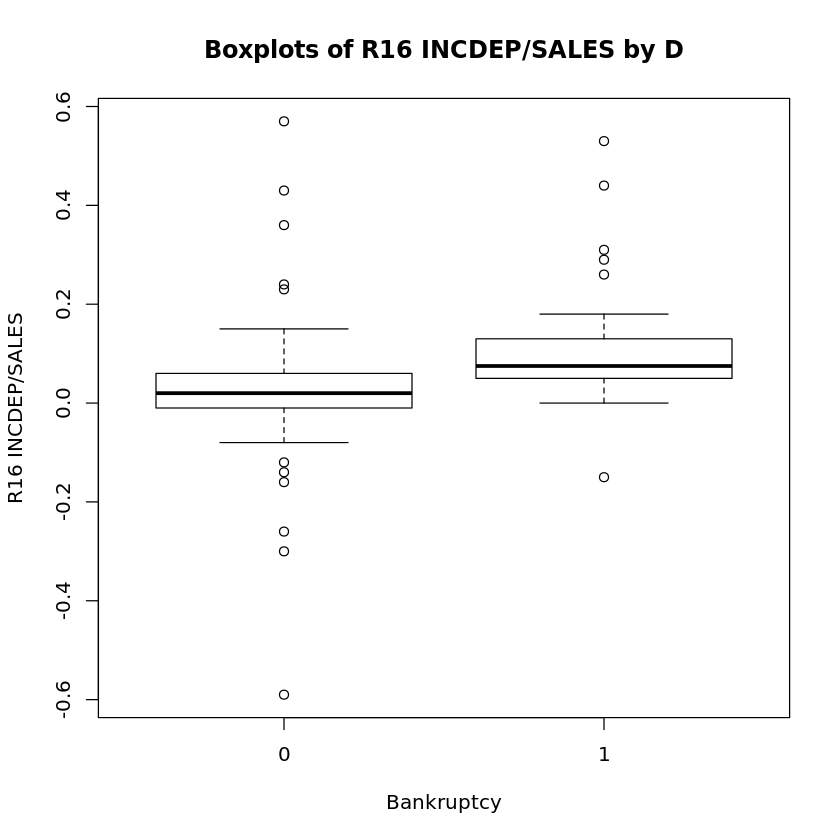

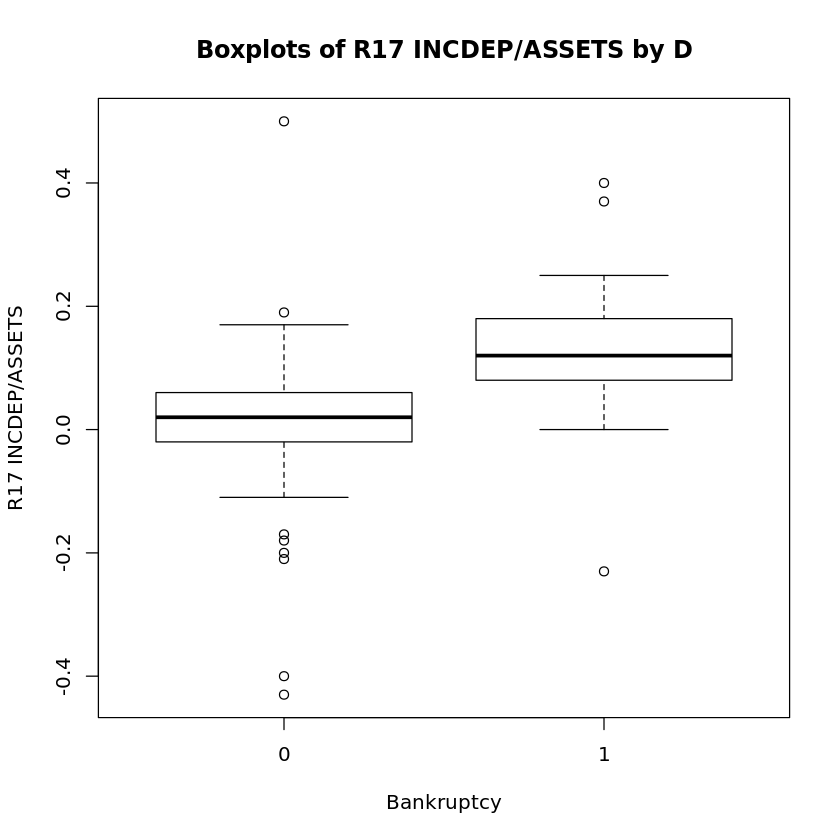

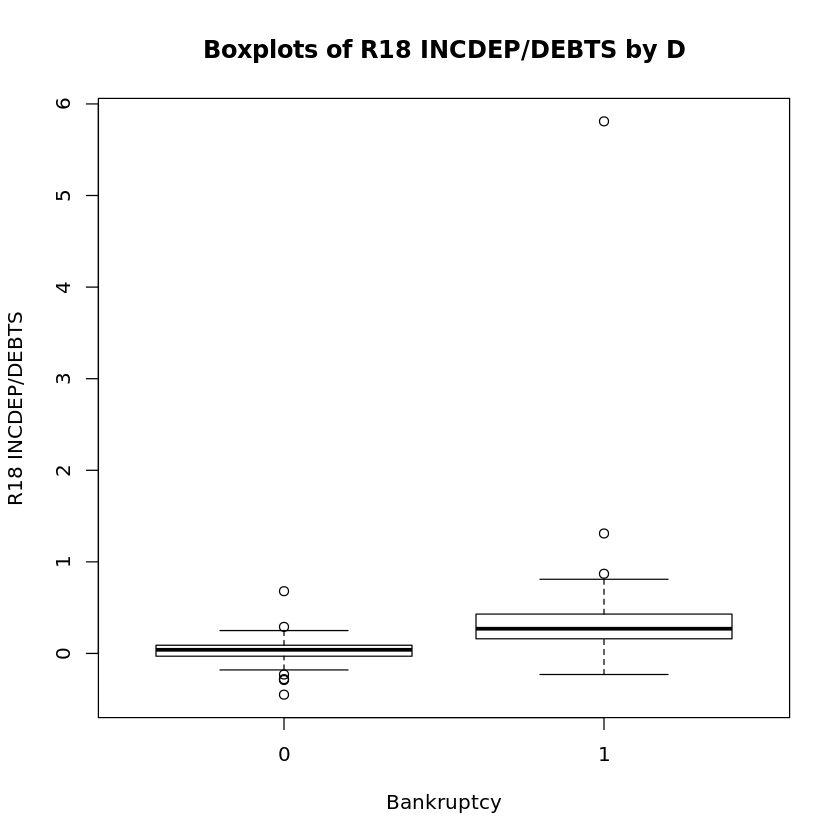

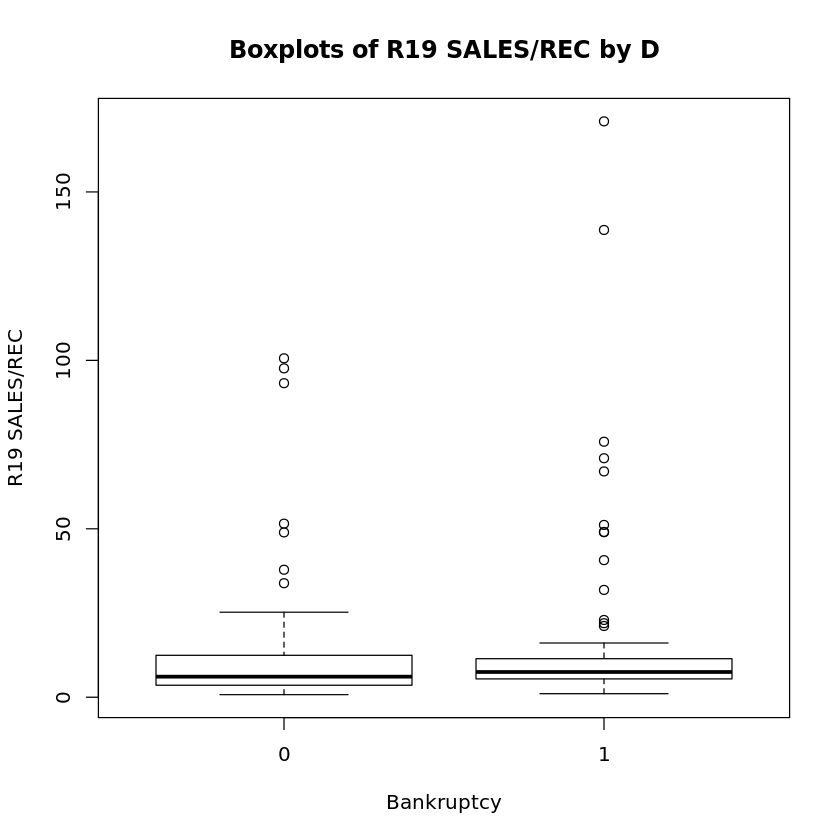

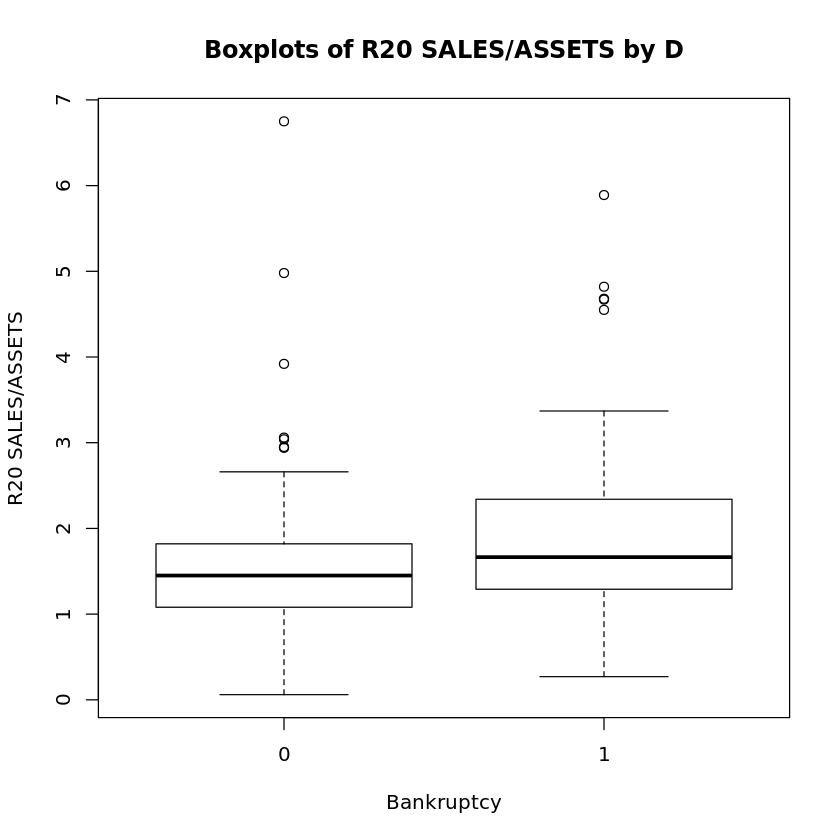

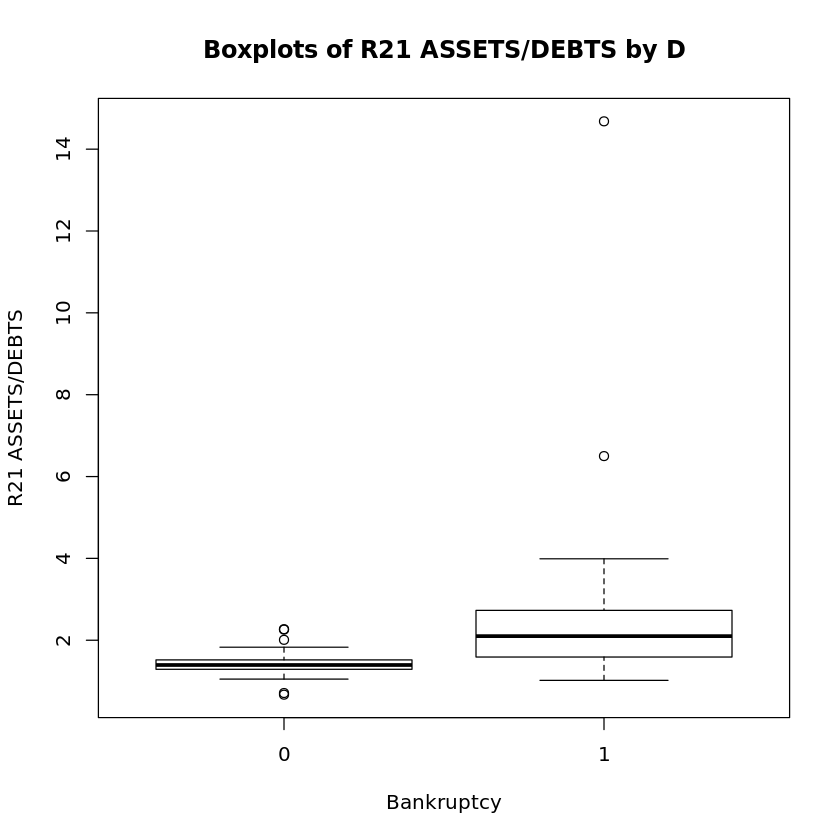

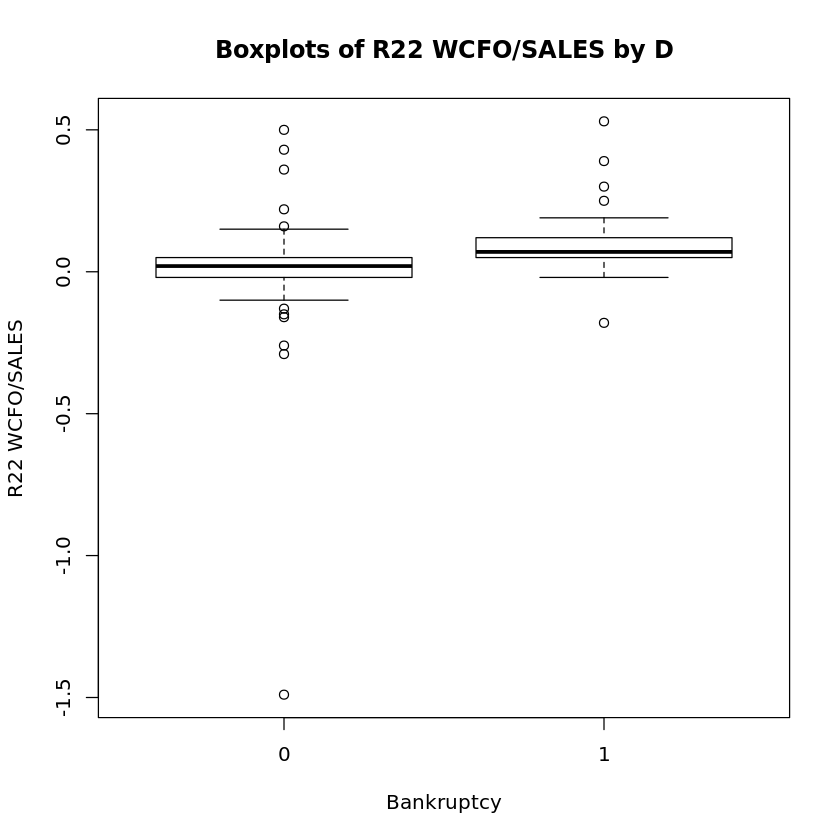

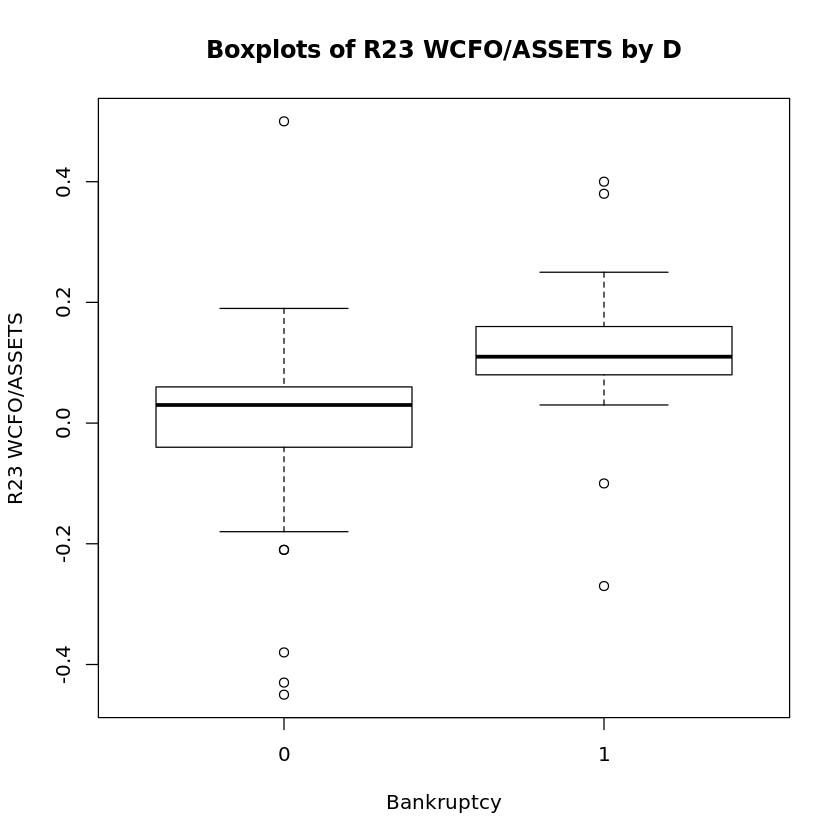

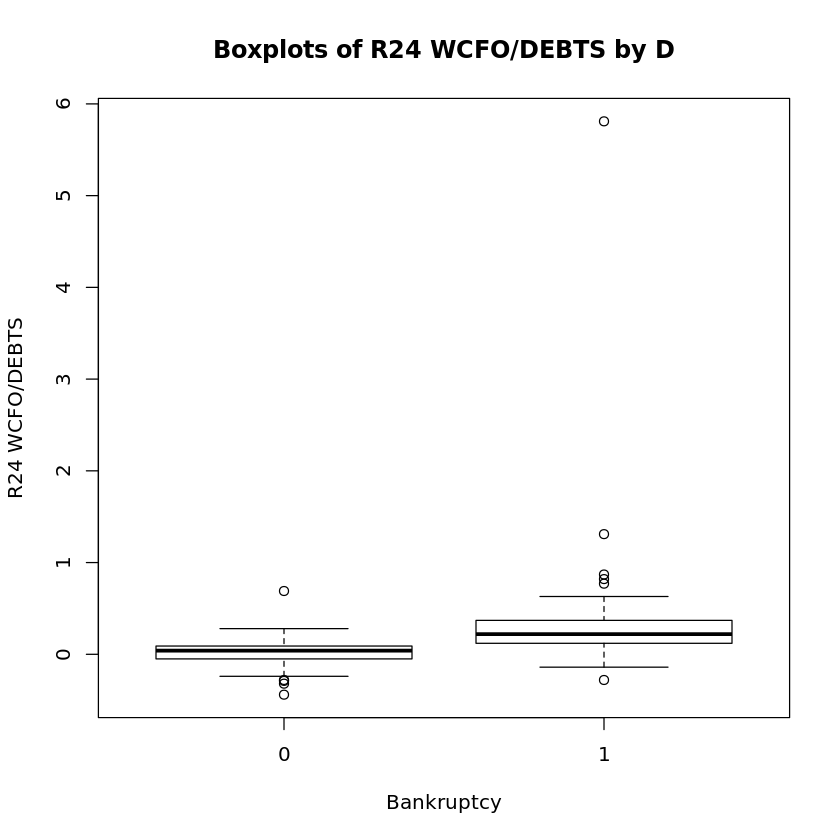

In [3]:
library(ggplot2)

# Create a box plots matrix of all of the columns, broken out by bankruptcy status 
print_boxplot <- function(var,label) {
    boxplot(var,data=bankrupt.df, main=paste("Boxplots of",label,"by D"),xlab="Bankruptcy", ylab=label)
}
print_boxplot(R1~D,"R1 CASH/CURDEBT")
print_boxplot(R2~D,"R2 CASH/SALES")
print_boxplot(R3~D,"R3 CASH/ASSETS")
print_boxplot(R4~D,"R4 CASH/DEBTS")
print_boxplot(R5~D,"R5 CFFO/SALES")
print_boxplot(R6~D,"R6 CFF0/ASSETS")
print_boxplot(R7~D,"R7 CFFO/DEBTS")
print_boxplot(R8~D,"R8 COGS/INV")
print_boxplot(R9~D,"R9 CURASS/CURDEBT")
print_boxplot(R10~D,"R10 CURASS/SALES")
print_boxplot(R11~D,"R11 CURASS/ASSETS")
print_boxplot(R12~D,"R12 CURDEBT/DEBTS")
print_boxplot(R13~D,"R13 INC/SALES")
print_boxplot(R14~D,"R14 INC/ASSETS")
print_boxplot(R15~D,"R15 INC/DEBTS")
print_boxplot(R16~D,"R16 INCDEP/SALES")
print_boxplot(R17~D,"R17 INCDEP/ASSETS")
print_boxplot(R18~D,"R18 INCDEP/DEBTS")
print_boxplot(R19~D,"R19 SALES/REC")
print_boxplot(R20~D,"R20 SALES/ASSETS")
print_boxplot(R21~D,"R21 ASSETS/DEBTS")
print_boxplot(R22~D,"R22 WCFO/SALES")
print_boxplot(R23~D,"R23 WCFO/ASSETS")
print_boxplot(R24~D,"R24 WCFO/DEBTS")

In [4]:
#Checking for single-variable outliers 
test.df <- bankrupt.df
test.df$R1 <- scale(bankrupt.df$R1,center = TRUE, scale = TRUE)
test.df$R2 <- scale(bankrupt.df$R2,center = TRUE, scale = TRUE)
test.df$R3 <- scale(bankrupt.df$R3,center = TRUE, scale = TRUE)
test.df$R4 <- scale(bankrupt.df$R4,center = TRUE, scale = TRUE)
test.df$R5 <- scale(bankrupt.df$R5,center = TRUE, scale = TRUE)
test.df$R6 <- scale(bankrupt.df$R6,center = TRUE, scale = TRUE)
test.df$R7 <- scale(bankrupt.df$R7,center = TRUE, scale = TRUE)
test.df$R8 <- scale(bankrupt.df$R8,center = TRUE, scale = TRUE)
test.df$R9 <- scale(bankrupt.df$R9,center = TRUE, scale = TRUE)
test.df$R10 <- scale(bankrupt.df$R10,center = TRUE, scale = TRUE)
test.df$R11 <- scale(bankrupt.df$R11,center = TRUE, scale = TRUE)
test.df$R12 <- scale(bankrupt.df$R12,center = TRUE, scale = TRUE)
test.df$R13 <- scale(bankrupt.df$R13,center = TRUE, scale = TRUE)
test.df$R14 <- scale(bankrupt.df$R14,center = TRUE, scale = TRUE)
test.df$R15 <- scale(bankrupt.df$R15,center = TRUE, scale = TRUE)
test.df$R16 <- scale(bankrupt.df$R16,center = TRUE, scale = TRUE)
test.df$R17 <- scale(bankrupt.df$R17,center = TRUE, scale = TRUE)
test.df$R18 <- scale(bankrupt.df$R18,center = TRUE, scale = TRUE)
test.df$R19 <- scale(bankrupt.df$R19,center = TRUE, scale = TRUE)
test.df$R20 <- scale(bankrupt.df$R20,center = TRUE, scale = TRUE)
test.df$R21 <- scale(bankrupt.df$R21,center = TRUE, scale = TRUE)
test.df$R22 <- scale(bankrupt.df$R22,center = TRUE, scale = TRUE)
test.df$R23 <- scale(bankrupt.df$R23,center = TRUE, scale = TRUE)
test.df$R24 <- scale(bankrupt.df$R24,center = TRUE, scale = TRUE)   
summary(test.df)

# View is not supported in Jupyter R
# View(test.df)

       NO               D             YR               R1.V1       
 Min.   :  1.00   Min.   :0.0   Min.   :70.00   Min.   :-0.563326  
 1st Qu.: 33.75   1st Qu.:0.0   1st Qu.:72.00   1st Qu.:-0.428163  
 Median : 66.50   Median :0.5   Median :74.00   Median :-0.273691  
 Mean   : 66.50   Mean   :0.5   Mean   :74.02   Mean   : 0.000000  
 3rd Qu.: 99.25   3rd Qu.:1.0   3rd Qu.:76.00   3rd Qu.:-0.037155  
 Max.   :132.00   Max.   :1.0   Max.   :82.00   Max.   : 8.936709  
        R2.V1               R3.V1               R4.V1       
 Min.   :-0.494194   Min.   :-0.911803   Min.   :-0.735541  
 1st Qu.:-0.333123   1st Qu.:-0.541090   1st Qu.:-0.546739  
 Median :-0.252588   Median :-0.293949   Median :-0.357937  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.:-0.010982   3rd Qu.: 0.200334   3rd Qu.: 0.078668  
 Max.   : 7.559337   Max.   : 6.996727   Max.   : 5.778129  
        R5.V1               R6.V1               R7.V1       
 Min.   :-8.694115   Min.   :-5.7858

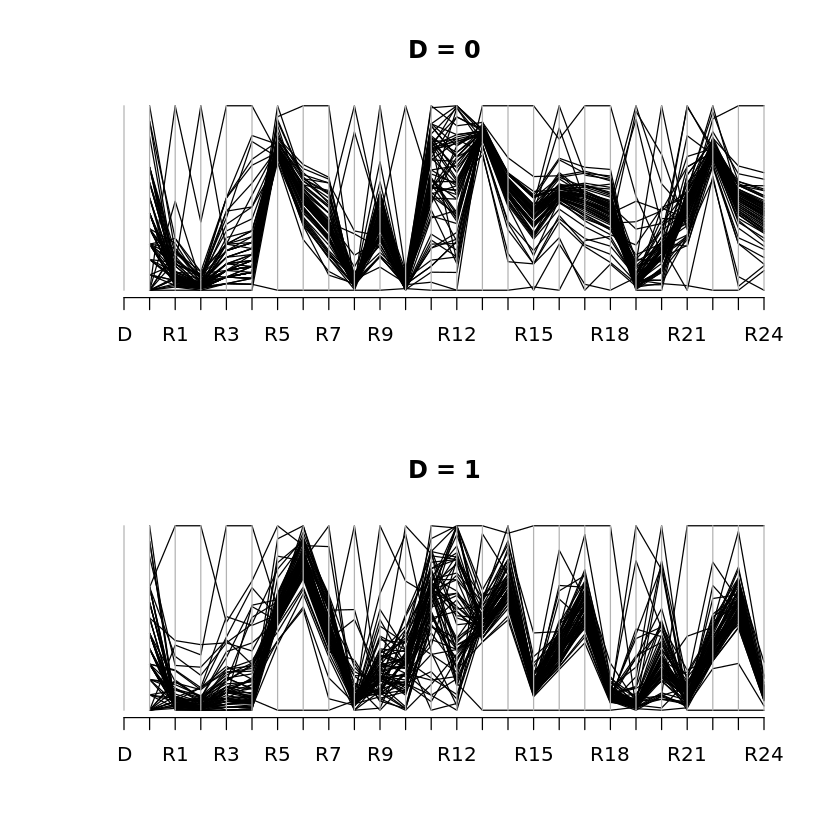

In [5]:
#Checking for multi-variable outliers using coordinate plot
#You will probably have to resize the plotting window, and have to use zoom.
library(MASS)
par(mfcol = c(2,1))
parcoord(bankrupt.df[bankrupt.df$D == 0,-1],main = "D = 0")
parcoord(bankrupt.df[bankrupt.df$D == 1,-1],main = "D = 1")

## Keep in mind, as you treat outliers, that you only have about 130 rows of data!

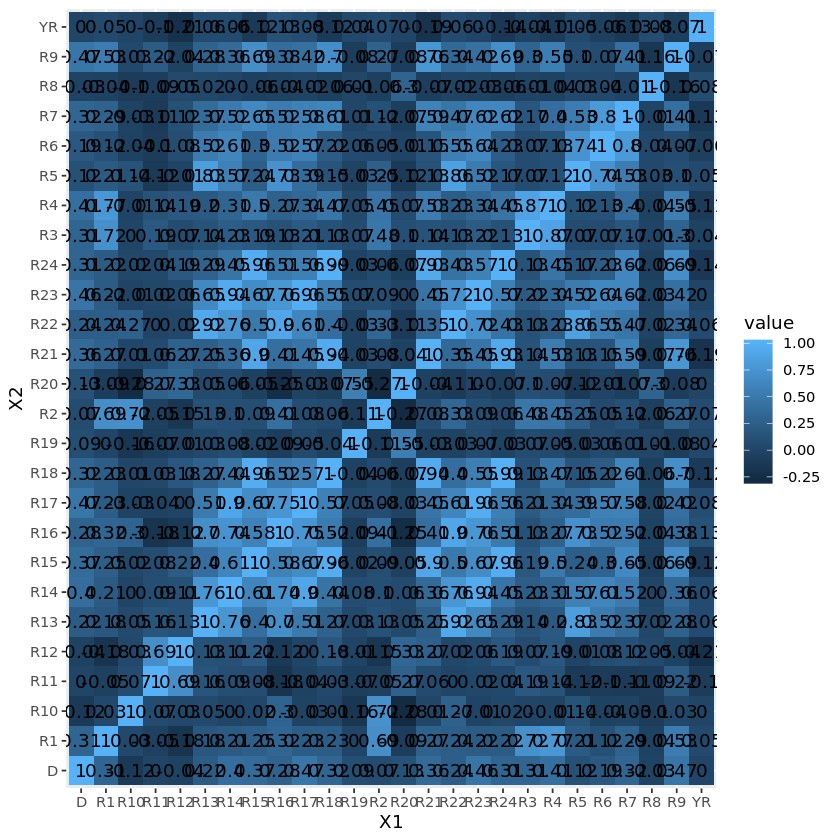

In [6]:
#Checking for highly correlated columns

# These installs happen as part of setting up the binder workspace (see install.R)
#install.packages("reshape")
#install.packages("tidyr")
library(reshape)
library(ggplot2)
cor.mat <- round(cor(bankrupt.df[,-1]),2)
melted.cor.mat <- melt(cor.mat)
ggplot(melted.cor.mat,aes(x=X1,y=X2,fill=value))+geom_tile() + geom_text(aes(x=X1,y=X2,label=value))
# Thought: several variables have correlations in the .9s, providing some guidance for thinning the variables.

# Data Preparation

In [7]:
# Convert D to a factor as that seems to be needed for he function confusionMatrix to work
bankrupt.df$D=as.factor(bankrupt.df$D) 

In [8]:
# Remove Irrelevant Variables
bankrupt.df$NO <- NULL #Strip column NO
bankrupt.df$YR <- NULL #Strip column YR
# Thought: Even if YR is a predictive variable, since we can't effect it then it is not useful given our objective
# Fortunate & awesome: D, the outcome variable, is now the first column  

In [9]:
# Remove Outliers
# Thought: Very small data set so need to be careful here
# The following records were determined to contain either single or multi-variate outlier values
# [16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129]

# Run kNN with and without the outlier records since it should be sensitive to skew and see if it performs better
library(caret)
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)

# Train kNN model with all data
kNN.training.rows <- sample(rownames(bankrupt.df),dim(bankrupt.df)[1]*0.6)
kNN.training.all <- bankrupt.df[kNN.training.rows,]
kNN.validate.rows <- setdiff(row.names(bankrupt.df),kNN.training.rows)
kNN.validate.all <- bankrupt.df[kNN.validate.rows,]
knn_fit_all <- train(D ~.,data = kNN.training.all,method = "knn",
             trControl=trctrl,
             preProcess = c("center", "scale"),
             tuneLength = 10)

# Train kNN model without outliers
bankrupt.df.outliers <- bankrupt.df[-c(16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129),]
kNN.training.rows <- sample(rownames(bankrupt.df.outliers),dim(bankrupt.df.outliers)[1]*0.6)
kNN.training.outliers <- bankrupt.df.outliers[kNN.training.rows,]
kNN.validate.rows <- setdiff(row.names(bankrupt.df.outliers),kNN.training.rows)
kNN.validate.outliers <- bankrupt.df.outliers[kNN.validate.rows,]
knn_fit_outliers <- train(D ~.,data = kNN.training.outliers,method = "knn",
             trControl=trctrl,
             preProcess = c("center", "scale"),
             tuneLength = 10)

print(knn_fit_all)
print(knn_fit_outliers)
        

Loading required package: lattice


k-Nearest Neighbors 

79 samples
24 predictors
 2 classes: '0', '1' 

Pre-processing: centered (24), scaled (24) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 71, 71, 71, 71, 71, 72, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7455688  0.4808349
   7  0.7517857  0.4919810
   9  0.7658069  0.5154035
  11  0.7789021  0.5424176
  13  0.7885582  0.5627752
  15  0.7890212  0.5641573
  17  0.7968915  0.5807849
  19  0.8048942  0.5992938
  21  0.7910714  0.5703822
  23  0.7869048  0.5572135

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 19.
k-Nearest Neighbors 

68 samples
24 predictors
 2 classes: '0', '1' 

Pre-processing: centered (24), scaled (24) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 61, 61, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8150794

In [10]:
# kNN classifier improves with outliers removed, so lets go ahead and take them out
bankrupt.df <- bankrupt.df[-c(16,44,49,58,66,67,77,78,87,91,95,98,100,104,107,125,126,129),]

In [11]:
#rescale (normalize)
library(scales)
# View(bankrupt.df)
bankrupt.df$R1 <- rescale(bankrupt.df$R1,to=c(0,1)) 
bankrupt.df$R2 <- rescale(bankrupt.df$R2,to=c(0,1)) 
bankrupt.df$R3 <- rescale(bankrupt.df$R3,to=c(0,1)) 
bankrupt.df$R4 <- rescale(bankrupt.df$R4,to=c(0,1)) 
bankrupt.df$R5 <- rescale(bankrupt.df$R5,to=c(0,1)) 
bankrupt.df$R6 <- rescale(bankrupt.df$R6,to=c(0,1)) 
bankrupt.df$R7 <- rescale(bankrupt.df$R7,to=c(0,1)) 
bankrupt.df$R8 <- rescale(bankrupt.df$R8,to=c(0,1)) 
bankrupt.df$R9 <- rescale(bankrupt.df$R9,to=c(0,1)) 
bankrupt.df$R10 <- rescale(bankrupt.df$R10,to=c(0,1)) 
bankrupt.df$R11 <- rescale(bankrupt.df$R11,to=c(0,1))
bankrupt.df$R12 <- rescale(bankrupt.df$R12,to=c(0,1)) 
bankrupt.df$R13 <- rescale(bankrupt.df$R13,to=c(0,1)) 
bankrupt.df$R14 <- rescale(bankrupt.df$R14,to=c(0,1)) 
bankrupt.df$R15 <- rescale(bankrupt.df$R15,to=c(0,1)) 
bankrupt.df$R16 <- rescale(bankrupt.df$R16,to=c(0,1)) 
bankrupt.df$R17 <- rescale(bankrupt.df$R17,to=c(0,1)) 
bankrupt.df$R18 <- rescale(bankrupt.df$R18,to=c(0,1)) 
bankrupt.df$R19 <- rescale(bankrupt.df$R19,to=c(0,1)) 
bankrupt.df$R20 <- rescale(bankrupt.df$R20,to=c(0,1)) 
bankrupt.df$R21 <- rescale(bankrupt.df$R21,to=c(0,1)) 
bankrupt.df$R22 <- rescale(bankrupt.df$R22,to=c(0,1)) 
bankrupt.df$R23 <- rescale(bankrupt.df$R23,to=c(0,1))
bankrupt.df$R24 <- rescale(bankrupt.df$R24,to=c(0,1)) 
summary(bankrupt.df) #check all mins and maxs are 0 and 1, respectively.

 D            R1                R2                R3               R4         
 0:61   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1:53   1st Qu.:0.04828   1st Qu.:0.05405   1st Qu.:0.1071   1st Qu.:0.07843  
        Median :0.09310   Median :0.08108   Median :0.1786   Median :0.13725  
        Mean   :0.14410   Mean   :0.11569   Mean   :0.2212   Mean   :0.21981  
        3rd Qu.:0.17931   3rd Qu.:0.15541   3rd Qu.:0.2857   3rd Qu.:0.27451  
        Max.   :1.00000   Max.   :1.00000   Max.   :1.0000   Max.   :1.00000  
       R5               R6               R7               R8         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2105   1st Qu.:0.4390   1st Qu.:0.4000   1st Qu.:0.07312  
 Median :0.2456   Median :0.5366   Median :0.4813   Median :0.09815  
 Mean   :0.2782   Mean   :0.5445   Mean   :0.5037   Mean   :0.15694  
 3rd Qu.:0.3333   3rd Qu.:0.6585   3rd Qu.:0.6125   3rd Qu.:0.15980  
 Max.   :1.0000   Max.   :1

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


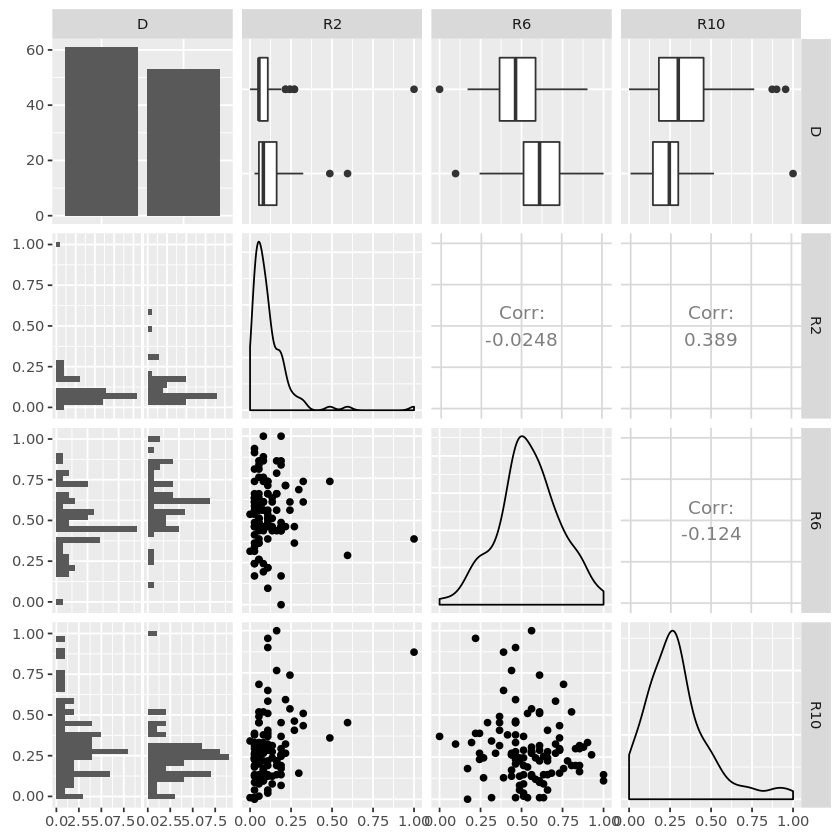

In [12]:
# Matrix scatterplots
# Suppose you want to produce a scatterplot matrix of D versus columns 3, 7, and 11
# install.packages("GGally")
library(ggplot2)
library(GGally)
ggpairs(bankrupt.df[,c(1,3,7,11)])

# Variable Selection

In [13]:
#Principal components analysis
pcs.cor <- prcomp(bankrupt.df[,-c(1,2)],scale. = T)
summary(pcs.cor)
# Looks like PC1 through PC6 picks up more than 86% of the cumulative variance
# Not going to use PCA since we care more explainability than performance
bankrupt.df.pca <- cbind(bankrupt.df[1],pcs.cor$x[,1:6])

Importance of components:
                          PC1    PC2    PC3     PC4   PC5     PC6     PC7
Standard deviation     3.0414 1.8260 1.6314 1.41576 1.260 1.06041 0.97148
Proportion of Variance 0.4022 0.1450 0.1157 0.08715 0.069 0.04889 0.04103
Cumulative Proportion  0.4022 0.5471 0.6628 0.74999 0.819 0.86788 0.90891
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.72299 0.63903 0.58000 0.47132 0.40244 0.33281 0.31415
Proportion of Variance 0.02273 0.01775 0.01463 0.00966 0.00704 0.00482 0.00429
Cumulative Proportion  0.93164 0.94940 0.96402 0.97368 0.98072 0.98554 0.98983
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     0.29197 0.24952 0.1594 0.14253 0.12399 0.10282 0.09455
Proportion of Variance 0.00371 0.00271 0.0011 0.00088 0.00067 0.00046 0.00039
Cumulative Proportion  0.99353 0.99624 0.9973 0.99823 0.99890 0.99936 0.99975
                          PC22    PC23
Standard de

In [14]:
#Partition into training and validation. Using a random partition of 60% for training, rest for validation
#Sample the data to get a training and validation data set
#Very thin data set. May have to stick to just two partitions.
set.seed(1)
training.rows <- sample(rownames(bankrupt.df),dim(bankrupt.df)[1]*0.6)
training <- bankrupt.df[training.rows,]
validate.rows <- setdiff(row.names(bankrupt.df),training.rows)
validate <- bankrupt.df[validate.rows,]

In [15]:
training.pca.rows <- sample(rownames(bankrupt.df.pca),dim(bankrupt.df.pca)[1]*0.6)
training.pca <- bankrupt.df.pca[training.pca.rows,]
validate.pca.rows <- setdiff(row.names(bankrupt.df.pca),training.pca.rows)
validate.pca <- bankrupt.df.pca[validate.pca.rows,]

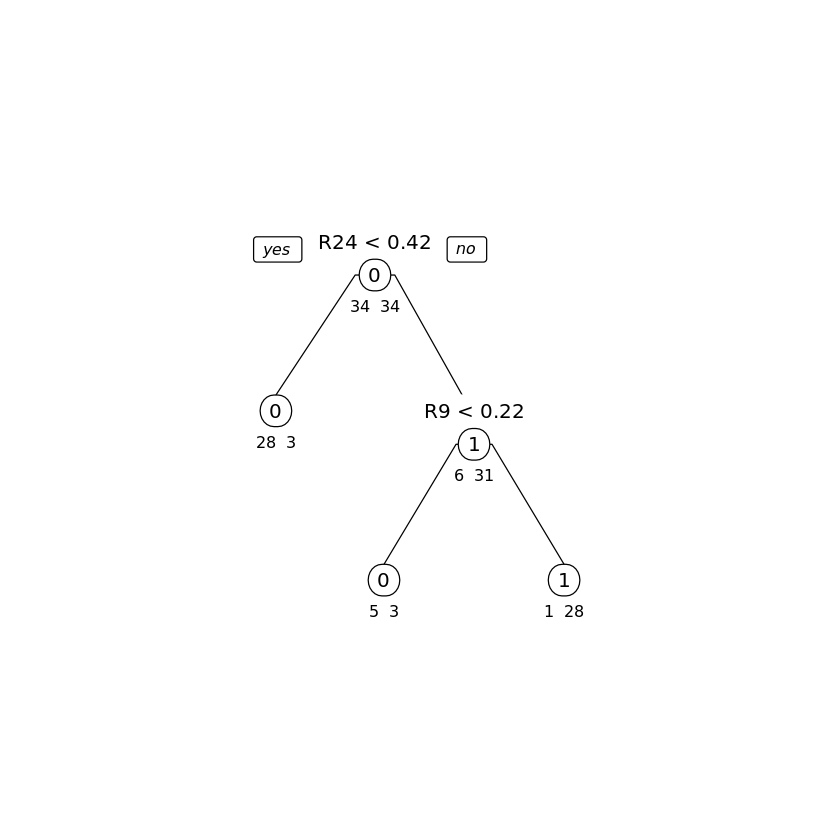

In [16]:
# CART
library(rpart)
library(rpart.plot)
library(caret)

# Train the model
default.ct <- rpart(D ~ .,data=training,method="class")

# Examine Tree for explanatory variables
prp(default.ct,type=1,extra=1,under=TRUE,split.font=1,varlen=-10)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



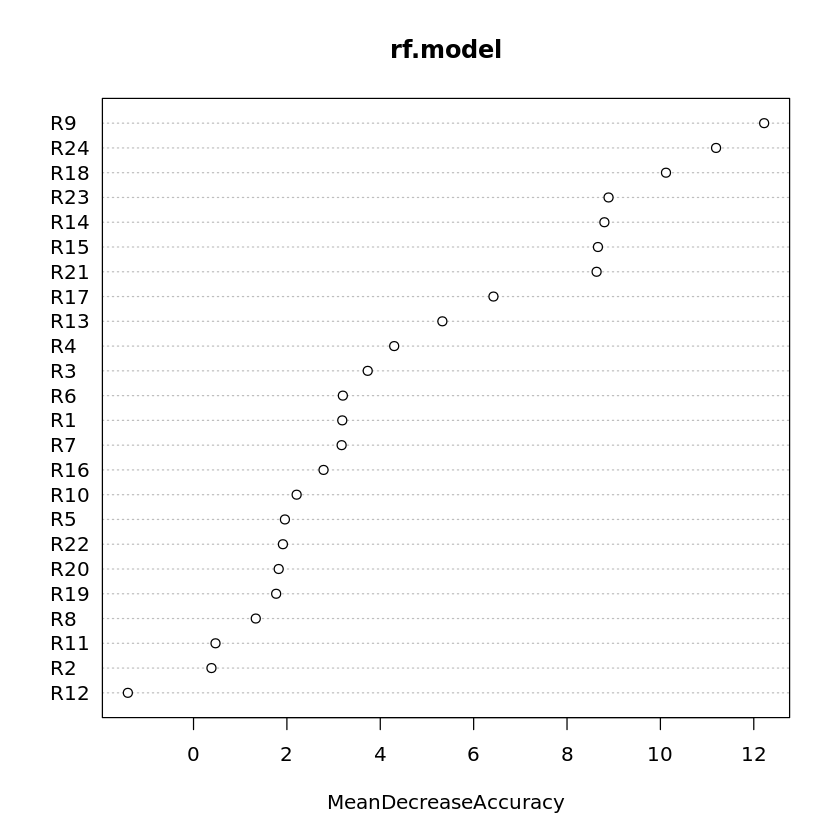

In [17]:
# Random Forest
library(randomForest)

# Train the model
rf.model <- randomForest(D~.,data=training,ntree=500,mtry=4,nodeize=5,importance=TRUE,norm.votes=TRUE)

# Examine the variable importance plot
varImpPlot(rf.model,type=1)

In [18]:
# Most important variables based on CART and RF models: ["R9","R24","R18","R23","R14","R15","R21","R17","R13"]
# Based on the correlation matrix the following are highly correlated: 
# R15 (CURASS/CURDEBT), R18 (INCDEP/DEBTS), R21 (ASSETS/DEBTS), and R24 (WCFO/DEBTS)
# R14 (INC/ASSETS), R17 (INCDEP/ASSETS),  and R23 (WCFO/ASSETS)
# We choose to keep R24 and R23 as they are the most predictive
bankrupt.df.reduced = bankrupt.df[c("D","R9", "R24", "R23", "R15", "R13")]
colnames(bankrupt.df.reduced)

training.reduced.rows <- sample(rownames(bankrupt.df.reduced),dim(bankrupt.df.reduced)[1]*0.6)
training.reduced <- bankrupt.df.reduced[training.reduced.rows,]
validate.reduced.rows <- setdiff(row.names(bankrupt.df.reduced),training.reduced.rows)
validate.reduced <- bankrupt.df.reduced[validate.reduced.rows,]

dim(training.reduced)
dim(validate.reduced)

[1] "D"   "R9"  "R24" "R23" "R15" "R13"

[1] 68  6

[1] 46  6

In [19]:
# H20 AI chose the following variables: []
# TBD

# Model Selection

## Helper Functions

In [20]:
# Draw lift chart 
lift_chart <- function(model, validate, type, label) {
    probabilities <- predict(model,validate,type)
    if (type=="prob") {
        lift.data <- data.frame(validate[,1],probabilities[,2])
    } else {
        lift.data <- data.frame(validate[,1],probabilities)
    }
    
    colnames(lift.data) <- c("actual","prob")
    lift.model <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
    print(xyplot(lift.model,plot="gain",main=label))
}

# CART
train_cart <- function(training, validate, verbose=FALSE) {
    
    # Train the model
    default.ct <- rpart(D ~ .,data=training,method="class")
    
    # Classify records in validate using the tree
    default.ct.point.pred.train <- predict(default.ct,training,type="class")
    default.ct.point.pred.validate <- predict(default.ct,validate,type="class")

    if (verbose) {
        # Draw the tree
        prp(default.ct,type=1,extra=1,under=TRUE,split.font=1,varlen=-10)
        
        # Confustion Matrices for training and validate
        print(confusionMatrix(default.ct.point.pred.train,training$D))
        print(confusionMatrix(default.ct.point.pred.validate,validate$D))
    
        #Lift chart for default CART classifier
        lift_chart(default.ct, validate, "prob", "Default Tree Classifier")
    }
    
    return (default.ct)
}

# Pruned Tree
train_pruned_tree <- function(training, validate, df, cp=0.00001, verbose=FALSE) {
    #First tabulate error as a functon of the complexity parameter CP
    cv.ct <- rpart(D~.,data=df,method="class",cp=cp,minsplit=3,xval=5)

    # Now let's try a pruned tree (based upon Figure9.12)
    pruned.ct <- prune(cv.ct,cp=cv.ct$cptable[which.min(cv.ct$cptable[,"xerror"]),"CP"])
    length(pruned.ct$frame$var[pruned.ct$frame$var == "<leaf>"])
    
    #Now classify records in validate using the pruned tree
    pruned.ct.point.pred.train <- predict(pruned.ct,training,type="class")
    pruned.ct.point.pred.validate <- predict(pruned.ct,validate,type="class")
    
    if (verbose) {
        printcp(cv.ct)
        prp(pruned.ct,type=1,extra=1,split.font=1,varlen=-10)
        print(confusionMatrix(pruned.ct.point.pred.train,training$D))
        print(confusionMatrix(pruned.ct.point.pred.validate,validate$D))
        lift_chart(pruned.ct, validate, "prob", "Pruned Tree Classifier")
    }
    
    return (pruned.ct)   
}

#Logistic regression classifier
library(gains)

train_logistic <- function(training, validate, cutoff=0.5, verbose=FALSE) {
    logit.reg <- glm(D~.,data=training,family="binomial")
    options(scipen=999)  # Turn off scientific notation
    training.pred <- predict(logit.reg,training,type="response")
    validate.pred <- predict(logit.reg,validate,type="response")
    
    if (verbose) {
        print(confusionMatrix(as.factor(ifelse(training.pred>cutoff,1,0)),training$D))
        print(confusionMatrix(as.factor(ifelse(validate.pred>cutoff,1,0)),validate$D))
        lift_chart(logit.reg, validate, "response", "Logistic Regression Classifier")
    }
    
    return (logit.reg)
}

# kNN
train_knn <- function(training, validate, verbose=FALSE) {
    trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
    set.seed(3333)
    knn_fit <- train(D ~.,data = training,method = "knn",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 10)
    
    if (verbose) {
        # The next command shows the tabulated values of k and the optimal value of k
        print(knn_fit)
        
        # Now examine confusion matrix
        training.pred <- predict(knn_fit, newdata = training)
        print(confusionMatrix(training.pred,training$D))
        validate.pred <- predict(knn_fit, newdata = validate)
        print(confusionMatrix(validate.pred,validate$D))
        lift_chart(knn_fit, validate, "prob", "kNN Classifier")
    }
    
    return (knn_fit)
}

#Random Forest
library(randomForest)

train_rf <- function(training, validate, verbose=FALSE) {
    rf.model <- randomForest(D~.,data=training,ntree=500,mtry=4,nodeize=5,importance=TRUE,norm.votes=TRUE)
    
    if (verbose) {
        varImpPlot(rf.model,type=1)
        training.pred <- predict(rf.model,training)
        print(confusionMatrix(training.pred,training$D))
        validate.pred <- predict(rf.model,validate)
        print(confusionMatrix(validate.pred,validate$D))
        lift_chart(rf.model, validate, "prob", "Random Forest")
    }
    
    return (rf.model)
}

# Boost algorithm
library(adabag)
library(rpart)
library(caret)

train_boost <- function(training, validate, verbose=FALSE) {
    boost.model <- boosting(D~.,data=training)
    
    if (verbose) {
        training.pred <- predict(boost.model,training)
        print(confusionMatrix(as.factor(training.pred$class),training$D))
        pred<-predict(boost.model,validate)
        print(confusionMatrix(as.factor(pred$class),validate$D))
        pred <- predict(boost.model,validate,type="prob")
        lift.data <- data.frame(validate[,1],pred$prob[,2])
        colnames(lift.data) <- c("actual","prob")
        lift.logit <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
        print(xyplot(lift.logit,label="gain",main="Boost Classifier"))
    }
    
    return (boost.model)
   
}

#XGBoost (Extreme Gradient Boosting) is a boosting algorithm based on 
#Gradient Boosting Machines.  XGboost applies regularization technique 
#to reduce overfitting, and it is one of the differences from the gradient 
# boosting. Another advantage of XGBoost over classical gradient boosting 
#is that it is fast in execution speed.
library(xgboost)

train_xgboost <- function(training, validate, verbose=FALSE) {
    #Note, the training x data should be matrix type to use in xgboost model.
    train_x <- data.matrix(training[,-1])
    train_y <- training[,1]
    test_x <- data.matrix(validate[,-1])
    test_y <- validate[,1]
    #Note that column 1 is the D variable 
    #Next, we need to convert the train and test data into xgb matrix type.
    xgb_train <- xgb.DMatrix(data=train_x, label=train_y)
    xgb_test <- xgb.DMatrix(data=test_x, label=test_y)
    xgbc <- xgboost(data=xgb_train, max.depth=6, nrounds=50) # Model building step
    
    if (verbose) {
        pred <- predict(xgbc, xgb_test)
        pred_y = as.factor((levels(test_y))[round(pred)])
        print(confusionMatrix(test_y, pred_y))
        
        probabilities <- predict(xgbc,xgb_test,objective="multi:softprob")
        lift.data <- data.frame(validate[,1],probabilities)
        colnames(lift.data) <- c("actual","prob")
        lift.xgboost <- lift(relevel(as.factor(lift.data[,1]),ref="1")~prob,data=lift.data)
        print(xyplot(lift.xgboost,plot="gain",main="XGBoost Classifier"))
        # The lift chart plot appears to be glitchy
    }
    
    return (xgbc)
}

Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel


## CART

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 0.8971   | 0.7174   | 5    | 8    |
| Reduced | 0.8676   | 0.6957   | 0    | 14   |

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 33  6
         1  1 28
                                          
               Accuracy : 0.8971          
                 95% CI : (0.7993, 0.9576)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 3.694e-12       
                                          
                  Kappa : 0.7941          
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9706          
            Specificity : 0.8235          
         Pos Pred Value : 0.8462          
         Neg Pred Value : 0.9655          
             Prevalence : 0.5000          
         Detection Rate : 0.4853          
   Detection Prevalence : 0.5735          
      Balanced Accuracy : 0.8971          
                                          
       'Positive' Class : 0               
                                    

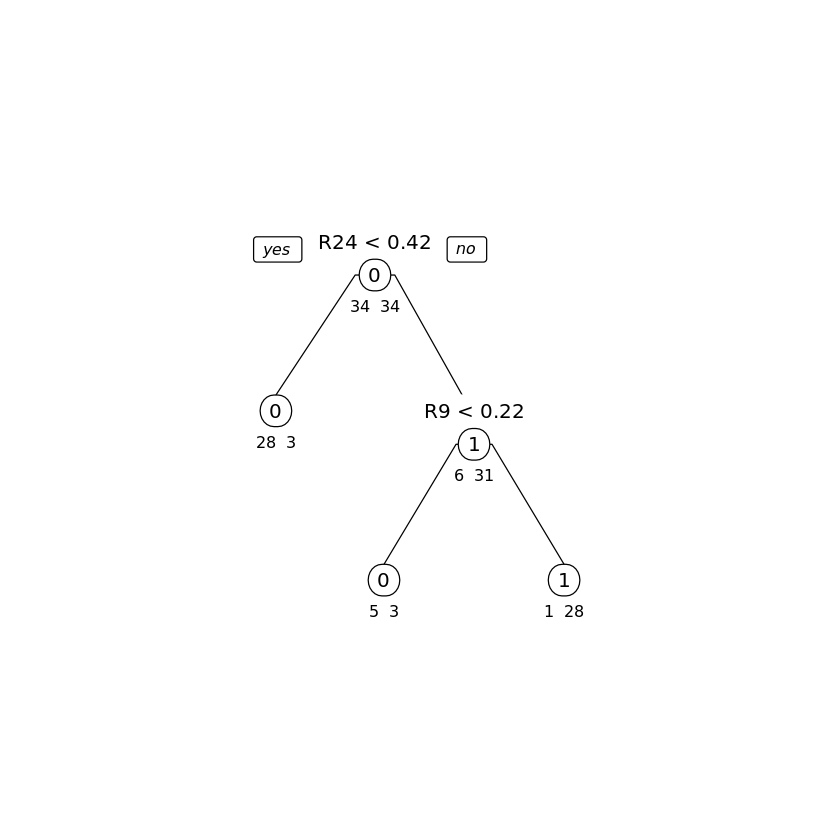

n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 34 0 (0.50000000 0.50000000)  
  2) R24< 0.4246032 31  3 0 (0.90322581 0.09677419) *
  3) R24>=0.4246032 37  6 1 (0.16216216 0.83783784)  
    6) R9< 0.2185355 8  3 0 (0.62500000 0.37500000) *
    7) R9>=0.2185355 29  1 1 (0.03448276 0.96551724) *

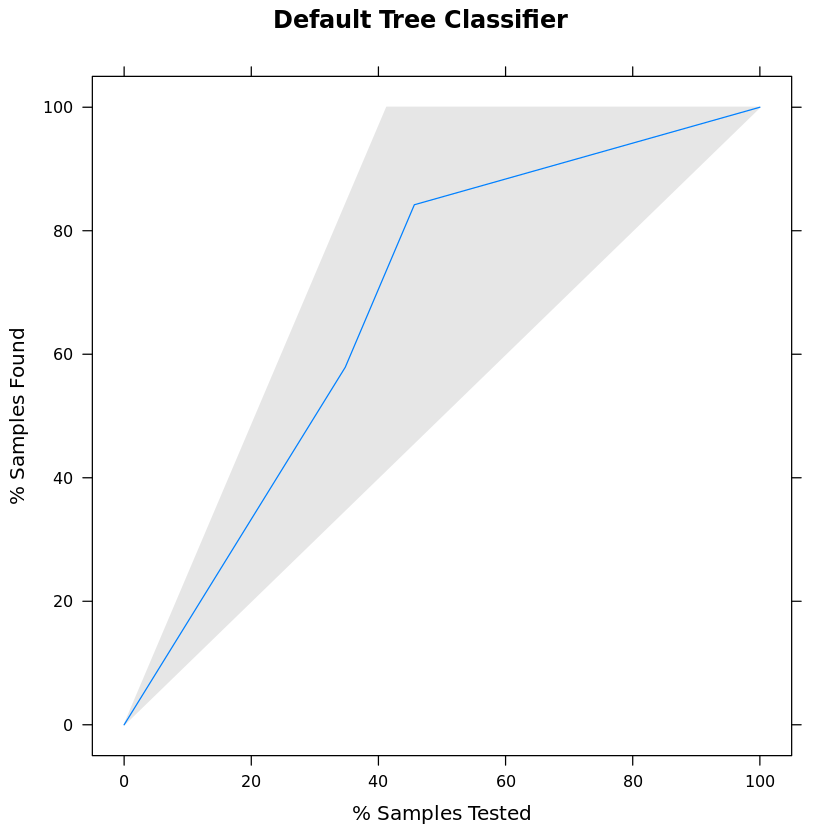

In [21]:
train_cart(training, validate, verbose=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42  8
         1  1 17
                                          
               Accuracy : 0.8676          
                 95% CI : (0.7636, 0.9377)
    No Information Rate : 0.6324          
    P-Value [Acc > NIR] : 1.452e-05       
                                          
                  Kappa : 0.6976          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.9767          
            Specificity : 0.6800          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.9444          
             Prevalence : 0.6324          
         Detection Rate : 0.6176          
   Detection Prevalence : 0.7353          
      Balanced Accuracy : 0.8284          
                                          
       'Positive' Class : 0               
                                    

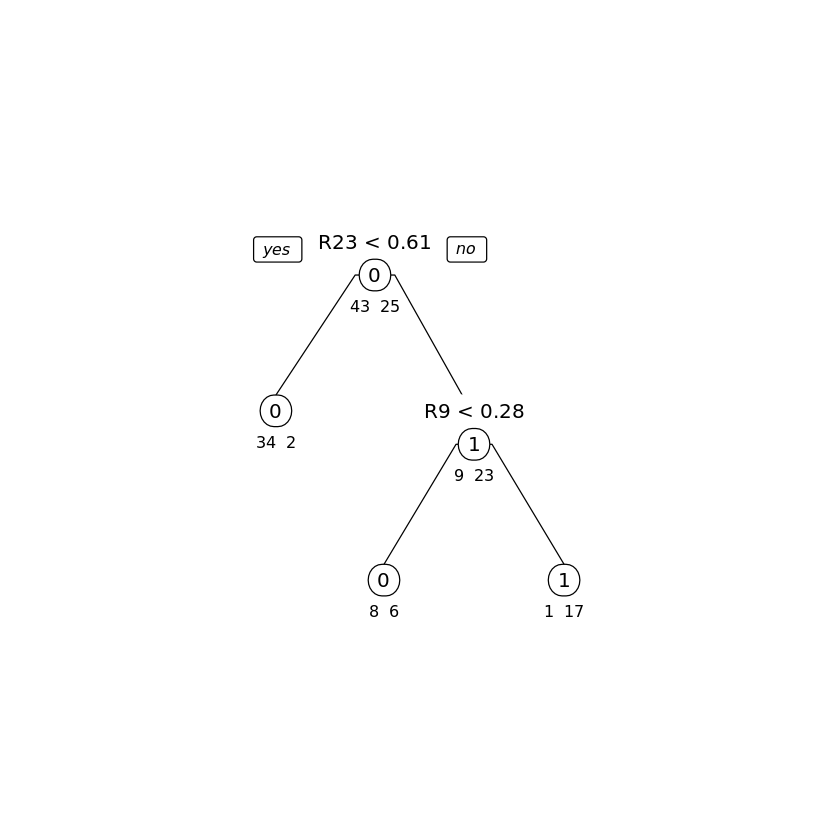

n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 25 0 (0.63235294 0.36764706)  
  2) R23< 0.6111111 36  2 0 (0.94444444 0.05555556) *
  3) R23>=0.6111111 32  9 1 (0.28125000 0.71875000)  
    6) R9< 0.284897 14  6 0 (0.57142857 0.42857143) *
    7) R9>=0.284897 18  1 1 (0.05555556 0.94444444) *

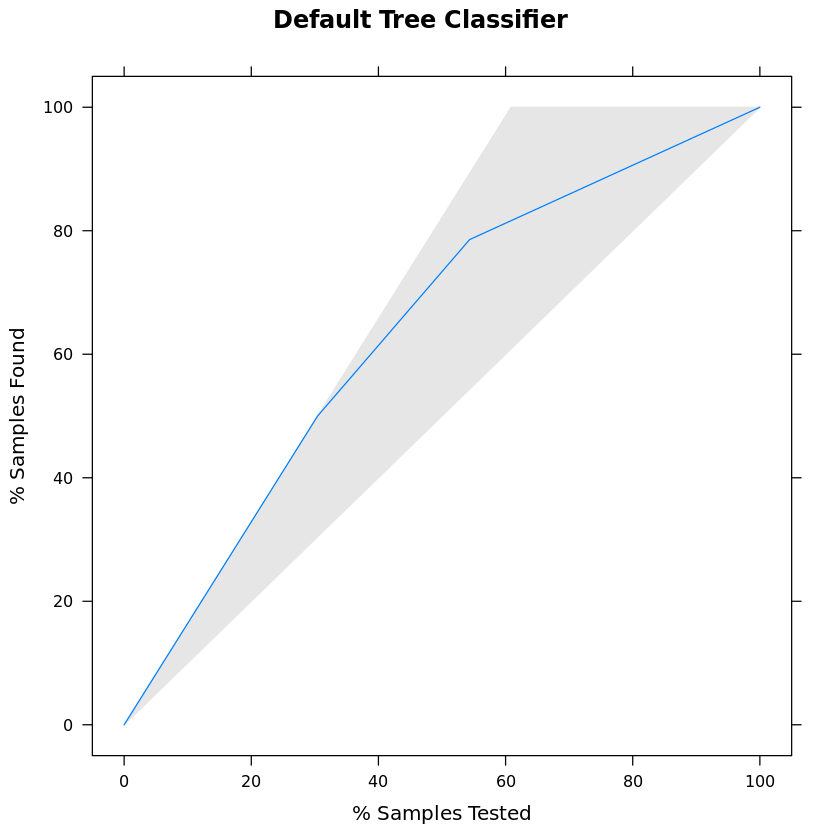

In [22]:
train_cart(training.reduced, validate.reduced, verbose=TRUE)

## Pruned Tree

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 0.8676   | 0.8261   | 5    | 3    |
| Full (best) | 0.9706   | 0.9783   | 1    | 0    |
| Reduced | 0.8235   | 0.8913   | 2    | 3    |
| PCA | 0.9853 | 0.9783 | 0 | 1 |


Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] R11 R13 R16 R17 R19 R2  R24 R7 

Root node error: 53/114 = 0.46491

n= 114 

        CP nsplit rel error  xerror     xstd
1 0.679245      0  1.000000 1.24528 0.099464
2 0.056604      1  0.320755 0.43396 0.080846
3 0.037736      2  0.264151 0.43396 0.080846
4 0.018868      7  0.075472 0.35849 0.075078
5 0.009434      8  0.056604 0.39623 0.078095
6 0.000010     10  0.037736 0.47170 0.083356
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  2
         1  0 32
                                          
               Accuracy : 0.9706          
                 95% CI : (0.8978, 0.9964)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9412          
                                        

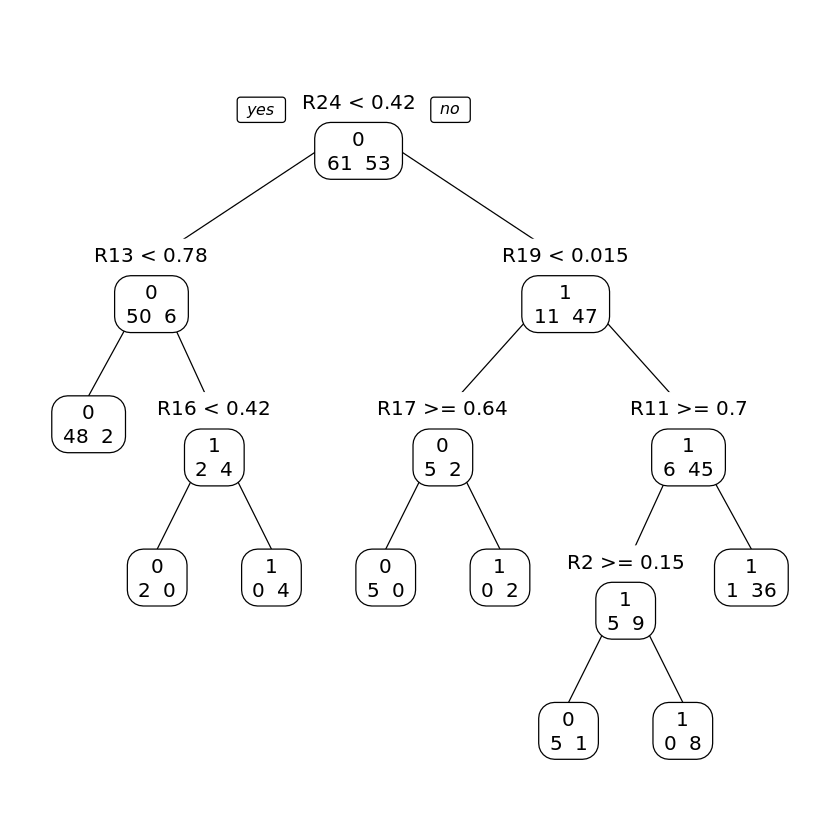

n= 114 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 114 53 0 (0.53508772 0.46491228)  
   2) R24< 0.4246032 56  6 0 (0.89285714 0.10714286)  
     4) R13< 0.7840909 50  2 0 (0.96000000 0.04000000) *
     5) R13>=0.7840909 6  2 1 (0.33333333 0.66666667)  
      10) R16< 0.4195402 2  0 0 (1.00000000 0.00000000) *
      11) R16>=0.4195402 4  0 1 (0.00000000 1.00000000) *
   3) R24>=0.4246032 58 11 1 (0.18965517 0.81034483)  
     6) R19< 0.01518362 7  2 0 (0.71428571 0.28571429)  
      12) R17>=0.64375 5  0 0 (1.00000000 0.00000000) *
      13) R17< 0.64375 2  0 1 (0.00000000 1.00000000) *
     7) R19>=0.01518362 51  6 1 (0.11764706 0.88235294)  
      14) R11>=0.6988636 14  5 1 (0.35714286 0.64285714)  
        28) R2>=0.1486486 6  1 0 (0.83333333 0.16666667) *
        29) R2< 0.1486486 8  0 1 (0.00000000 1.00000000) *
      15) R11< 0.6988636 37  1 1 (0.02702703 0.97297297) *

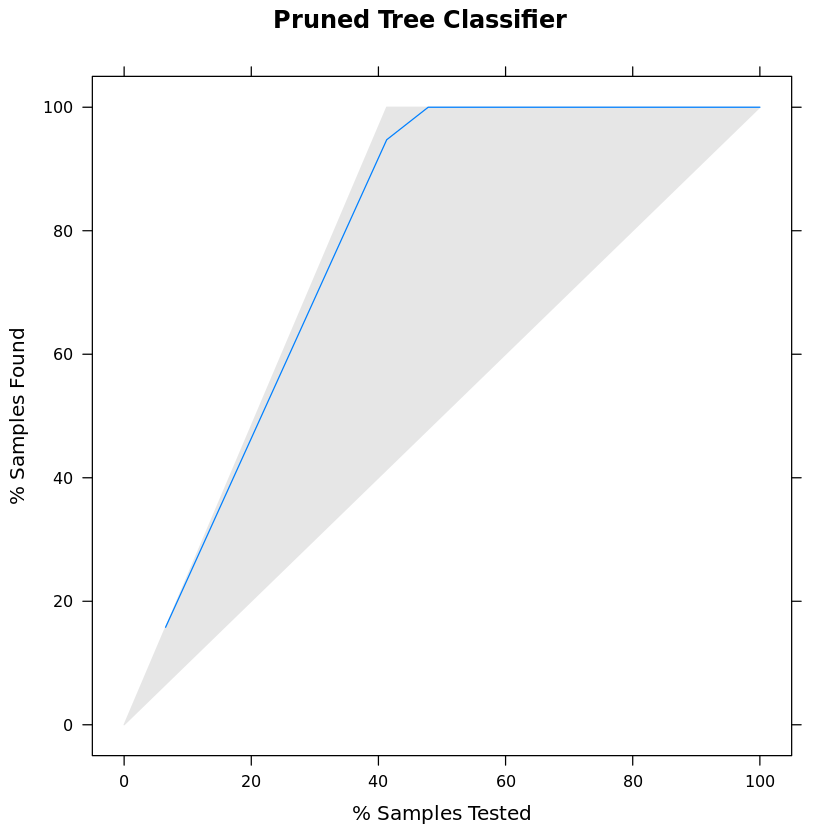

In [25]:
# Full dataset
train_pruned_tree(training, validate, bankrupt.df, verbose=TRUE)


Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] R13 R15 R23 R24 R9 

Root node error: 53/114 = 0.46491

n= 114 

         CP nsplit rel error  xerror     xstd
1 0.6792453      0  1.000000 1.00000 0.100479
2 0.0377358      1  0.320755 0.32075 0.071760
3 0.0251572      2  0.283019 0.39623 0.078095
4 0.0188679      5  0.207547 0.41509 0.079502
5 0.0094340     12  0.075472 0.41509 0.079502
6 0.0062893     16  0.037736 0.49057 0.084528
7 0.0000100     19  0.018868 0.49057 0.084528
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  3
         1  9 22
                                         
               Accuracy : 0.8235         
                 95% CI : (0.712, 0.9053)
    No Information Rate : 0.6324         
    P-Value [Acc > NIR] : 0.0004839      
                                         
                  Kappa : 0.6386         
      

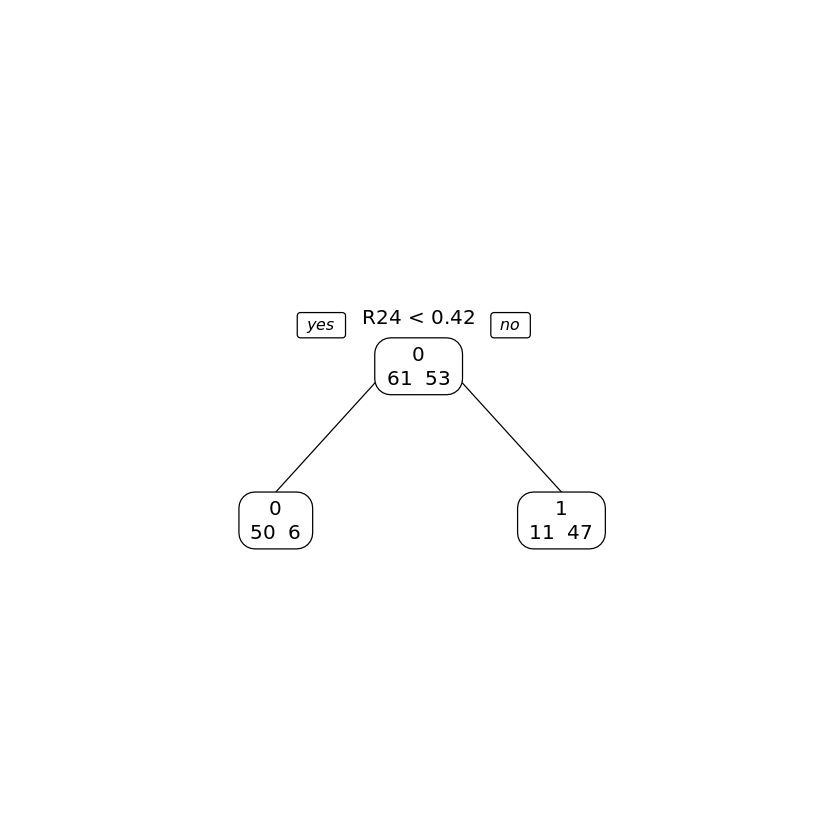

n= 114 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 114 53 0 (0.5350877 0.4649123)  
  2) R24< 0.4246032 56  6 0 (0.8928571 0.1071429) *
  3) R24>=0.4246032 58 11 1 (0.1896552 0.8103448) *

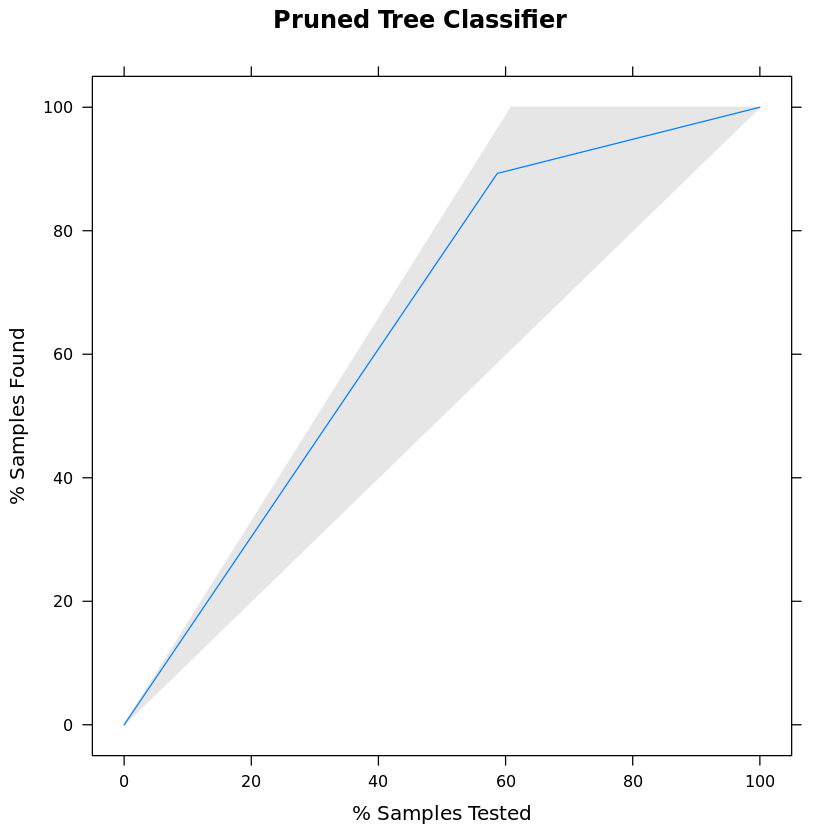

In [26]:
# Reduced dataset
train_pruned_tree(training.reduced, validate.reduced, bankrupt.df.reduced, verbose=TRUE)


Classification tree:
rpart(formula = D ~ ., data = df, method = "class", cp = cp, 
    minsplit = 3, xval = 5)

Variables actually used in tree construction:
[1] PC1 PC2 PC3 PC4 PC5 PC6

Root node error: 53/114 = 0.46491

n= 114 

         CP nsplit rel error  xerror     xstd
1 0.6226415      0  1.000000 1.16981 0.100339
2 0.0660377      1  0.377358 0.39623 0.078095
3 0.0471698      3  0.245283 0.45283 0.082129
4 0.0377358      5  0.150943 0.45283 0.082129
5 0.0188679      6  0.113208 0.41509 0.079502
6 0.0062893     10  0.037736 0.33962 0.073459
7 0.0000100     13  0.018868 0.35849 0.075078
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 38  1
         1  0 29
                                          
               Accuracy : 0.9853          
                 95% CI : (0.9208, 0.9996)
    No Information Rate : 0.5588          
    P-Value [Acc > NIR] : 3.569e-16       
                                          
                  Kappa : 0.9701      

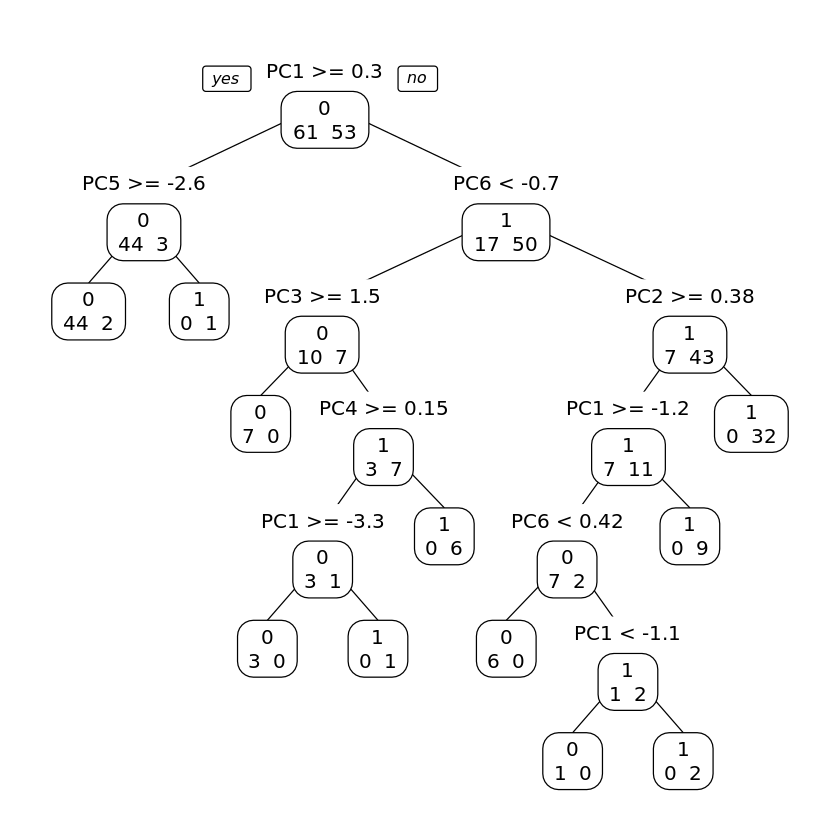

n= 114 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 114 53 0 (0.53508772 0.46491228)  
    2) PC1>=0.3008886 47  3 0 (0.93617021 0.06382979)  
      4) PC5>=-2.567959 46  2 0 (0.95652174 0.04347826) *
      5) PC5< -2.567959 1  0 1 (0.00000000 1.00000000) *
    3) PC1< 0.3008886 67 17 1 (0.25373134 0.74626866)  
      6) PC6< -0.703939 17  7 0 (0.58823529 0.41176471)  
       12) PC3>=1.527823 7  0 0 (1.00000000 0.00000000) *
       13) PC3< 1.527823 10  3 1 (0.30000000 0.70000000)  
         26) PC4>=0.1540526 4  1 0 (0.75000000 0.25000000)  
           52) PC1>=-3.338061 3  0 0 (1.00000000 0.00000000) *
           53) PC1< -3.338061 1  0 1 (0.00000000 1.00000000) *
         27) PC4< 0.1540526 6  0 1 (0.00000000 1.00000000) *
      7) PC6>=-0.703939 50  7 1 (0.14000000 0.86000000)  
       14) PC2>=0.3787399 18  7 1 (0.38888889 0.61111111)  
         28) PC1>=-1.23617 9  2 0 (0.77777778 0.22222222)  
           56) PC6< 0.4198208 6  0 0 (1.00000000 0

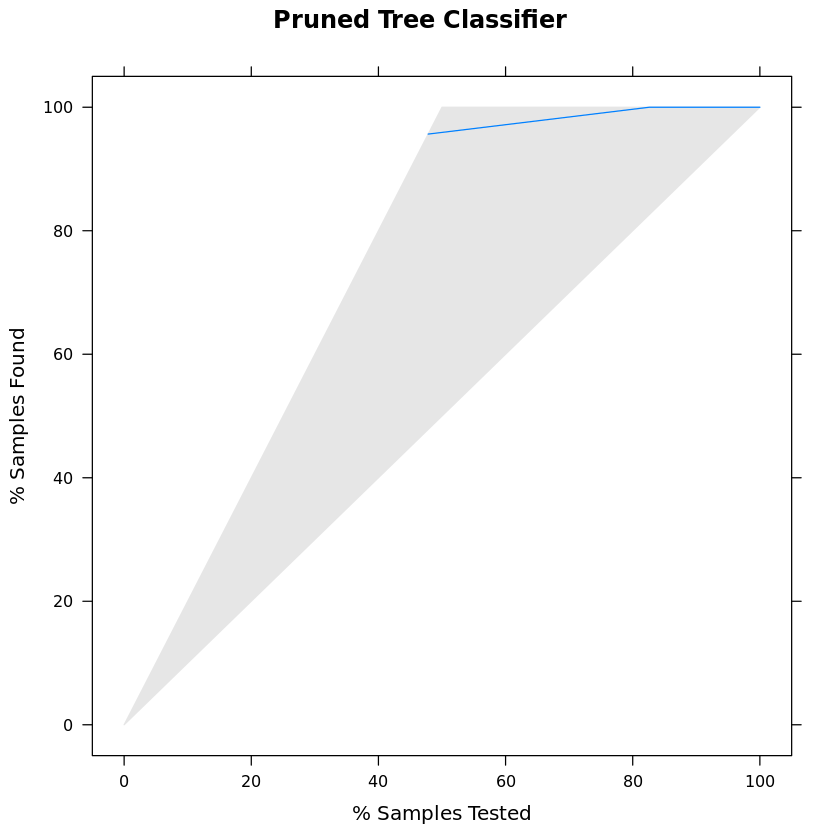

In [27]:
# PCA dataset
train_pruned_tree(training.pca, validate.pca, bankrupt.df.pca, verbose=TRUE)

## Logistic Regression
- Thought: Classic case of overfitting when all variables are included

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 1.0   | 0.5217   | 14    | 8    |
| Reduced | 0.75   | 0.8696   | 2    | 4    |

In [28]:
# Test with 5 different values for the cutoff hyperparameter [0.1, 0.25, 0.5, 0.75, 0.9]
logit.reg <- train_logistic(training, validate)
pred <- predict(logit.reg,validate,type="response")
confusionMatrix(as.factor(ifelse(pred>0.1,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.25,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.5,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.75,1,0)),validate$D)
confusionMatrix(as.factor(ifelse(pred>0.9,1,0)),validate$D)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  8
         1 14 11
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3695, 0.6711)
    No Information Rate : 0.587           
    P-Value [Acc > NIR] : 0.8526          
                                          
                  Kappa : 0.0577          
                                          
 Mcnemar's Test P-Value : 0.2864          
                                          
            Sensitivity : 0.4815          
            Specificity : 0.5789          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.4400          
             Prevalence : 0.5870          
         Detection Rate : 0.2826          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.5302          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  8
         1 14 11
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3695, 0.6711)
    No Information Rate : 0.587           
    P-Value [Acc > NIR] : 0.8526          
                                          
                  Kappa : 0.0577          
                                          
 Mcnemar's Test P-Value : 0.2864          
                                          
            Sensitivity : 0.4815          
            Specificity : 0.5789          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.4400          
             Prevalence : 0.5870          
         Detection Rate : 0.2826          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.5302          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  8
         1 14 11
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3695, 0.6711)
    No Information Rate : 0.587           
    P-Value [Acc > NIR] : 0.8526          
                                          
                  Kappa : 0.0577          
                                          
 Mcnemar's Test P-Value : 0.2864          
                                          
            Sensitivity : 0.4815          
            Specificity : 0.5789          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.4400          
             Prevalence : 0.5870          
         Detection Rate : 0.2826          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.5302          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  8
         1 14 11
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3695, 0.6711)
    No Information Rate : 0.587           
    P-Value [Acc > NIR] : 0.8526          
                                          
                  Kappa : 0.0577          
                                          
 Mcnemar's Test P-Value : 0.2864          
                                          
            Sensitivity : 0.4815          
            Specificity : 0.5789          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.4400          
             Prevalence : 0.5870          
         Detection Rate : 0.2826          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.5302          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  8
         1 14 11
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3695, 0.6711)
    No Information Rate : 0.587           
    P-Value [Acc > NIR] : 0.8526          
                                          
                  Kappa : 0.0577          
                                          
 Mcnemar's Test P-Value : 0.2864          
                                          
            Sensitivity : 0.4815          
            Specificity : 0.5789          
         Pos Pred Value : 0.6190          
         Neg Pred Value : 0.4400          
             Prevalence : 0.5870          
         Detection Rate : 0.2826          
   Detection Prevalence : 0.4565          
      Balanced Accuracy : 0.5302          
                                          
       'Positive' Class : 0               
                                    

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  0
         1  0 34
                                               
               Accuracy : 1                    
                 95% CI : (0.9472, 1)          
    No Information Rate : 0.5                  
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 1                    
                                               
 Mcnemar's Test P-Value : NA                   
                                               
            Sensitivity : 1.0                  
            Specificity : 1.0                  
         Pos Pred Value : 1.0                  
         Neg Pred Value : 1.0                  
             Prevalence : 0.5                  
         Detection Rate : 0.5                  
   Detection Prevalence : 0.5                  
      Balanced Accuracy : 1.0                  
                                


Call:  glm(formula = D ~ ., family = "binomial", data = training)

Coefficients:
(Intercept)           R1           R2           R3           R4           R5  
    -561.27      -249.98        98.04       310.13      -517.93        31.45  
         R6           R7           R8           R9          R10          R11  
   -1241.53      1532.68       252.79       240.97      -191.88       489.82  
        R12          R13          R14          R15          R16          R17  
    -481.38      -231.34     -2189.07      3055.34     -2774.32    -11395.35  
        R18          R19          R20          R21          R22          R23  
   14236.71       158.38      -245.31      1305.21      2887.37     14097.22  
        R24  
  -18014.78  

Degrees of Freedom: 67 Total (i.e. Null);  43 Residual
Null Deviance:	    94.27 
Residual Deviance: 0.00000001372 	AIC: 50

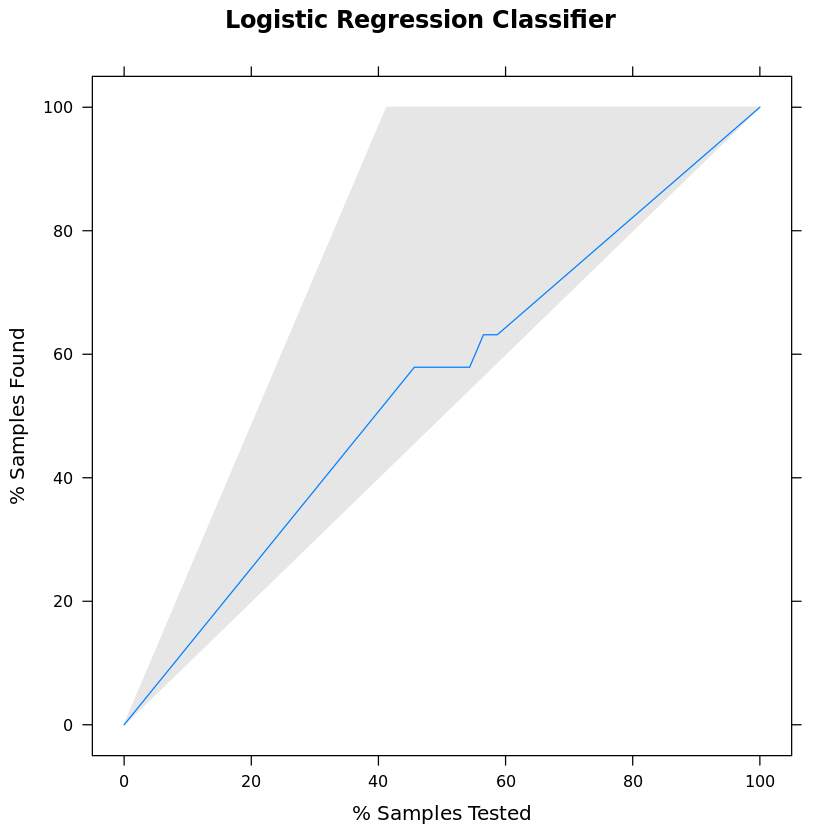

In [29]:
# Performance is the same regardless of cutoff value so use 0.5 (seems strange, maybe something wonky happening)
train_logistic(training, validate, 0.5, TRUE)

In [33]:
# Reduced dataset
# Test with 5 different values for the cutoff hyperparameter [0.1, 0.25, 0.5, 0.75, 0.9]
logit.reg <- train_logistic(training.reduced, validate.reduced)
pred <- predict(logit.reg,validate.reduced,type="response")
confusionMatrix(as.factor(ifelse(pred>0.1,1,0)),validate.reduced$D)
confusionMatrix(as.factor(ifelse(pred>0.25,1,0)),validate.reduced$D)
confusionMatrix(as.factor(ifelse(pred>0.5,1,0)),validate.reduced$D)
confusionMatrix(as.factor(ifelse(pred>0.75,1,0)),validate.reduced$D)
confusionMatrix(as.factor(ifelse(pred>0.9,1,0)),validate.reduced$D)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 16  4
         1  2 24
                                          
               Accuracy : 0.8696          
                 95% CI : (0.7374, 0.9506)
    No Information Rate : 0.6087          
    P-Value [Acc > NIR] : 0.000102        
                                          
                  Kappa : 0.7315          
                                          
 Mcnemar's Test P-Value : 0.683091        
                                          
            Sensitivity : 0.8889          
            Specificity : 0.8571          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9231          
             Prevalence : 0.3913          
         Detection Rate : 0.3478          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.8730          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17  8
         1  1 20
                                          
               Accuracy : 0.8043          
                 95% CI : (0.6609, 0.9064)
    No Information Rate : 0.6087          
    P-Value [Acc > NIR] : 0.003813        
                                          
                  Kappa : 0.616           
                                          
 Mcnemar's Test P-Value : 0.045500        
                                          
            Sensitivity : 0.9444          
            Specificity : 0.7143          
         Pos Pred Value : 0.6800          
         Neg Pred Value : 0.9524          
             Prevalence : 0.3913          
         Detection Rate : 0.3696          
   Detection Prevalence : 0.5435          
      Balanced Accuracy : 0.8294          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17  9
         1  1 19
                                          
               Accuracy : 0.7826          
                 95% CI : (0.6364, 0.8905)
    No Information Rate : 0.6087          
    P-Value [Acc > NIR] : 0.009754        
                                          
                  Kappa : 0.5772          
                                          
 Mcnemar's Test P-Value : 0.026857        
                                          
            Sensitivity : 0.9444          
            Specificity : 0.6786          
         Pos Pred Value : 0.6538          
         Neg Pred Value : 0.9500          
             Prevalence : 0.3913          
         Detection Rate : 0.3696          
   Detection Prevalence : 0.5652          
      Balanced Accuracy : 0.8115          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17 12
         1  1 16
                                          
               Accuracy : 0.7174          
                 95% CI : (0.5654, 0.8401)
    No Information Rate : 0.6087          
    P-Value [Acc > NIR] : 0.085087        
                                          
                  Kappa : 0.4651          
                                          
 Mcnemar's Test P-Value : 0.005546        
                                          
            Sensitivity : 0.9444          
            Specificity : 0.5714          
         Pos Pred Value : 0.5862          
         Neg Pred Value : 0.9412          
             Prevalence : 0.3913          
         Detection Rate : 0.3696          
   Detection Prevalence : 0.6304          
      Balanced Accuracy : 0.7579          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17 17
         1  1 11
                                          
               Accuracy : 0.6087          
                 95% CI : (0.4537, 0.7491)
    No Information Rate : 0.6087          
    P-Value [Acc > NIR] : 0.564177        
                                          
                  Kappa : 0.2911          
                                          
 Mcnemar's Test P-Value : 0.000407        
                                          
            Sensitivity : 0.9444          
            Specificity : 0.3929          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.9167          
             Prevalence : 0.3913          
         Detection Rate : 0.3696          
   Detection Prevalence : 0.7391          
      Balanced Accuracy : 0.6687          
                                          
       'Positive' Class : 0               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 27  1
         1 16 24
                                          
               Accuracy : 0.75            
                 95% CI : (0.6302, 0.8471)
    No Information Rate : 0.6324          
    P-Value [Acc > NIR] : 0.027201        
                                          
                  Kappa : 0.5223          
                                          
 Mcnemar's Test P-Value : 0.000685        
                                          
            Sensitivity : 0.6279          
            Specificity : 0.9600          
         Pos Pred Value : 0.9643          
         Neg Pred Value : 0.6000          
             Prevalence : 0.6324          
         Detection Rate : 0.3971          
   Detection Prevalence : 0.4118          
      Balanced Accuracy : 0.7940          
                                          
       'Positive' Class : 0               
                                    


Call:  glm(formula = D ~ ., family = "binomial", data = training)

Coefficients:
(Intercept)           R9          R24          R23          R15          R13  
    -27.820        8.781      -23.465       57.989       26.575      -20.270  

Degrees of Freedom: 67 Total (i.e. Null);  62 Residual
Null Deviance:	    89.45 
Residual Deviance: 35.92 	AIC: 47.92

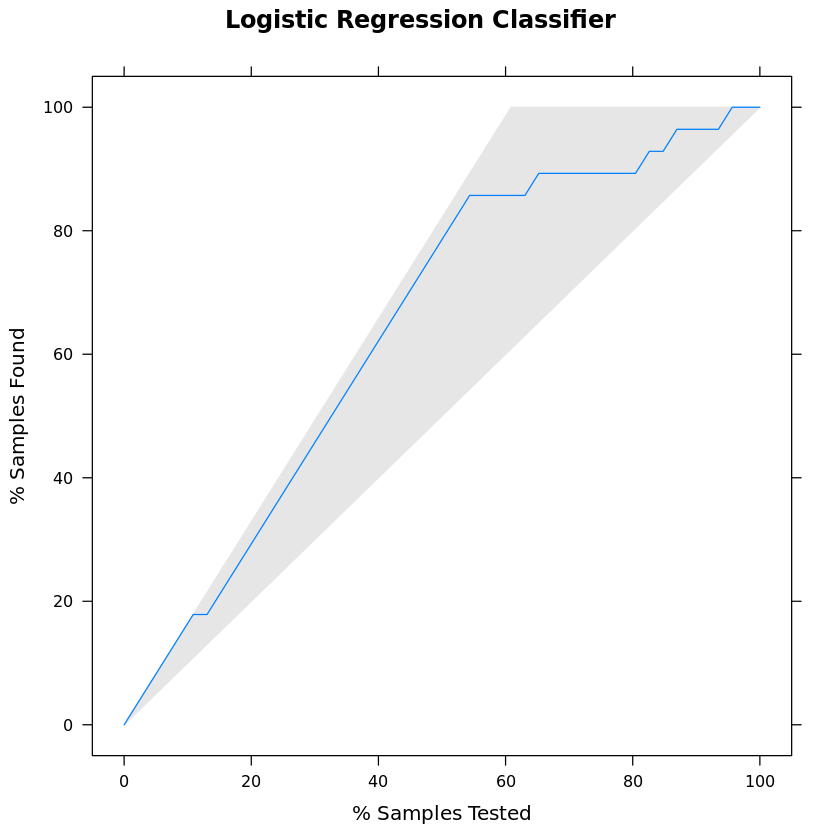

In [37]:
# Performance is best at 0.1
train_logistic(training.reduced, validate.reduced, 0.1, TRUE)

## kNN

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 0.8382   | 0.8696   | 3    | 3    |
| Reduced | 0.8235   | 0.7174   | 1    | 12   |

k-Nearest Neighbors 

68 samples
24 predictors
 2 classes: '0', '1' 

Pre-processing: centered (24), scaled (24) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 61, 61, 62, 61, 62, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7349206  0.4760830
   7  0.7363095  0.4765274
   9  0.7992063  0.6016361
  11  0.8240079  0.6479848
  13  0.8279762  0.6541044
  15  0.8184524  0.6354378
  17  0.8248016  0.6506418
  19  0.8049603  0.6128076
  21  0.7833333  0.5673423
  23  0.7537698  0.5097917

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 27  4
         1  7 30
                                         
               Accuracy : 0.8382         
                 95% CI : (0.729, 0.9164)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : 0.000000006375 

k-Nearest Neighbors 

68 samples
24 predictors
 2 classes: '0', '1' 

Pre-processing: centered (24), scaled (24) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 61, 61, 62, 61, 62, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7349206  0.4760830
   7  0.7363095  0.4765274
   9  0.7992063  0.6016361
  11  0.8240079  0.6479848
  13  0.8279762  0.6541044
  15  0.8184524  0.6354378
  17  0.8248016  0.6506418
  19  0.8049603  0.6128076
  21  0.7833333  0.5673423
  23  0.7537698  0.5097917

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.

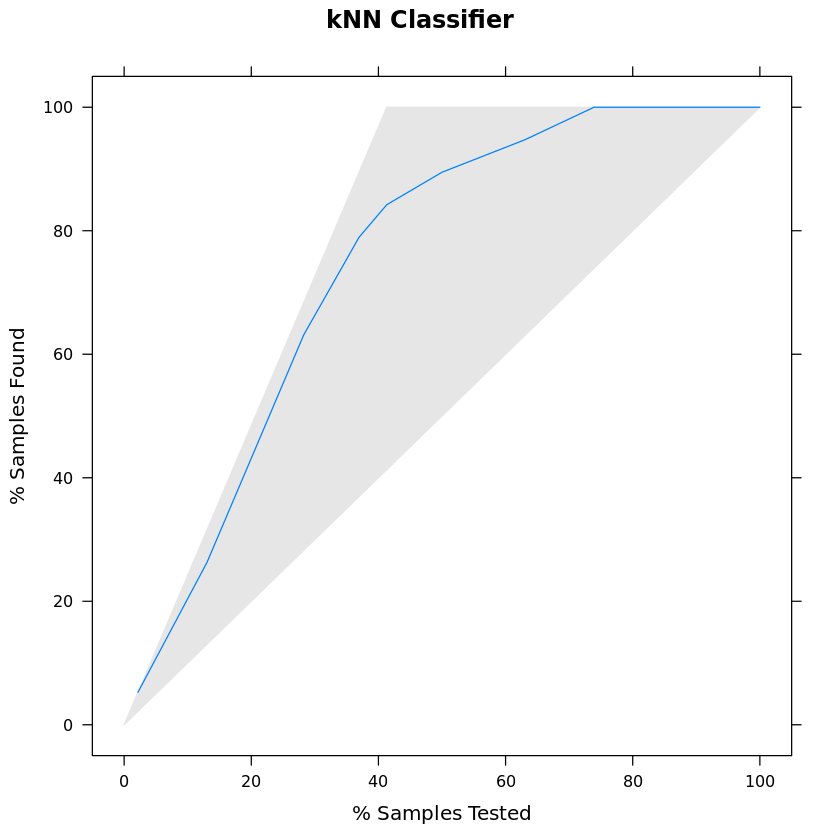

In [38]:
train_knn(training, validate, verbose=TRUE)

k-Nearest Neighbors 

68 samples
 5 predictor
 2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 62, 60, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7940476  0.5324640
   7  0.7746032  0.4911762
   9  0.7787698  0.4970126
  11  0.7642857  0.4649323
  13  0.8065476  0.5379620
  15  0.8232143  0.5674858
  17  0.8273810  0.5757398
  19  0.8273810  0.5757398
  21  0.8273810  0.5757398
  23  0.8321429  0.5853476

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 23.
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 41 10
         1  2 15
                                         
               Accuracy : 0.8235         
                 95% CI : (0.712, 0.9053)
    No Information Rate : 0.6324         
    P-Value [Acc > NIR] : 0.0004839      
  

k-Nearest Neighbors 

68 samples
 5 predictor
 2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 61, 62, 60, 61, 61, 61, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7940476  0.5324640
   7  0.7746032  0.4911762
   9  0.7787698  0.4970126
  11  0.7642857  0.4649323
  13  0.8065476  0.5379620
  15  0.8232143  0.5674858
  17  0.8273810  0.5757398
  19  0.8273810  0.5757398
  21  0.8273810  0.5757398
  23  0.8321429  0.5853476

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

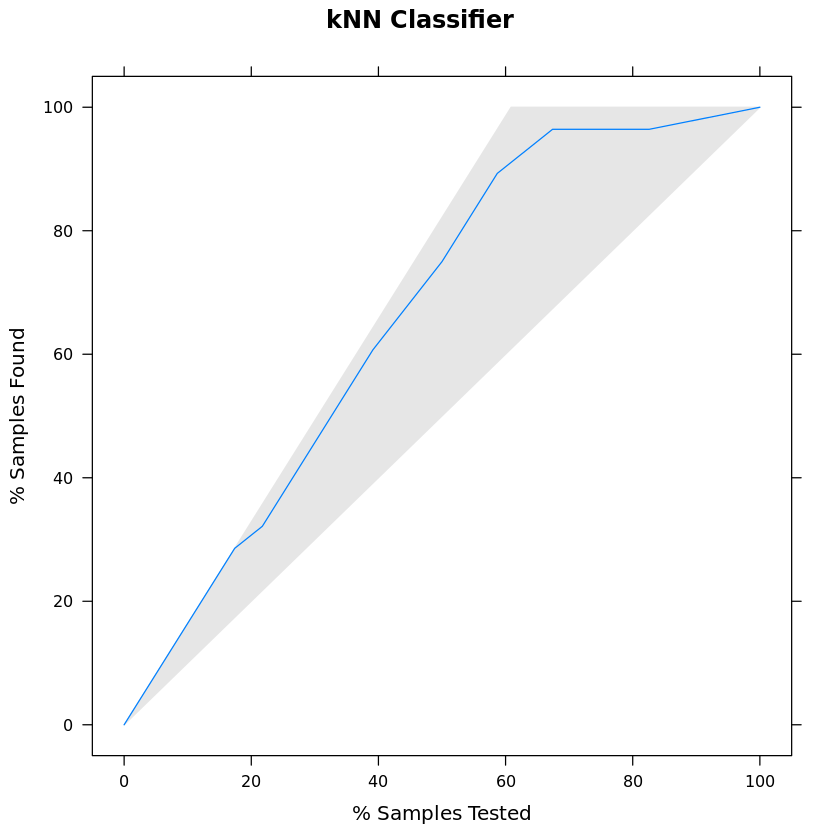

In [39]:
train_knn(training.reduced, validate.reduced, verbose=TRUE)

## Random Forest
- Thought: Overfitting when using all variables
- Thought: Still overfitting when using reduced variables (probably need to tune)

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 1.0   | 0.8043   | 6    | 3    |
| Reduced | 1.0   | 0.7826   | 1    | 9    |

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  0
         1  0 34
                                               
               Accuracy : 1                    
                 95% CI : (0.9472, 1)          
    No Information Rate : 0.5                  
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 1                    
                                               
 Mcnemar's Test P-Value : NA                   
                                               
            Sensitivity : 1.0                  
            Specificity : 1.0                  
         Pos Pred Value : 1.0                  
         Neg Pred Value : 1.0                  
             Prevalence : 0.5                  
         Detection Rate : 0.5                  
   Detection Prevalence : 0.5                  
      Balanced Accuracy : 1.0                  
                                

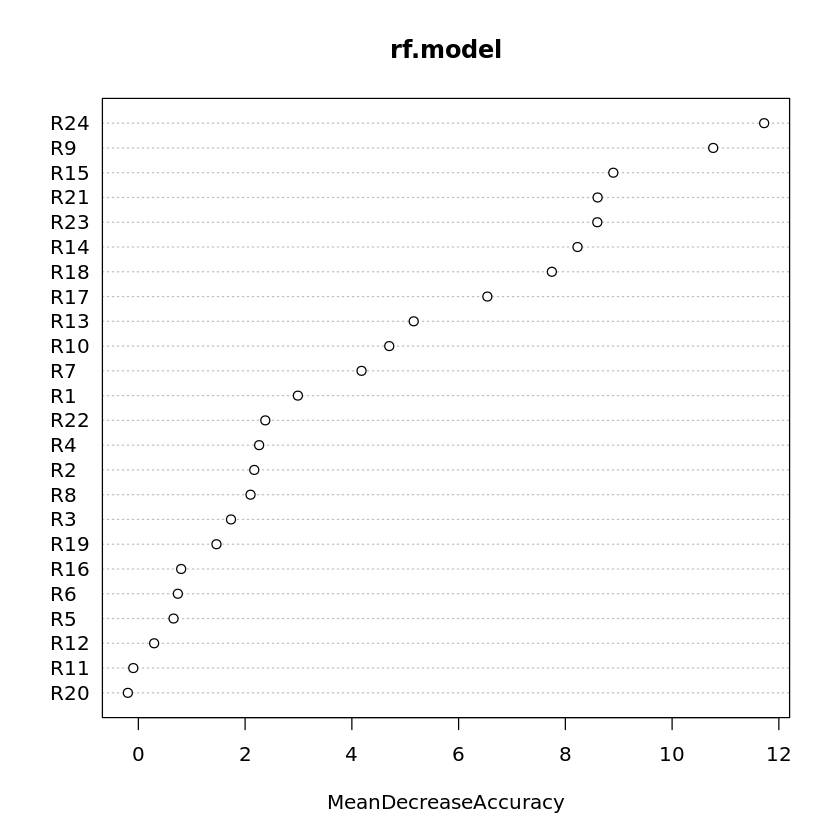


Call:
 randomForest(formula = D ~ ., data = training, ntree = 500, mtry = 4,      nodeize = 5, importance = TRUE, norm.votes = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 17.65%
Confusion matrix:
   0  1 class.error
0 27  7   0.2058824
1  5 29   0.1470588

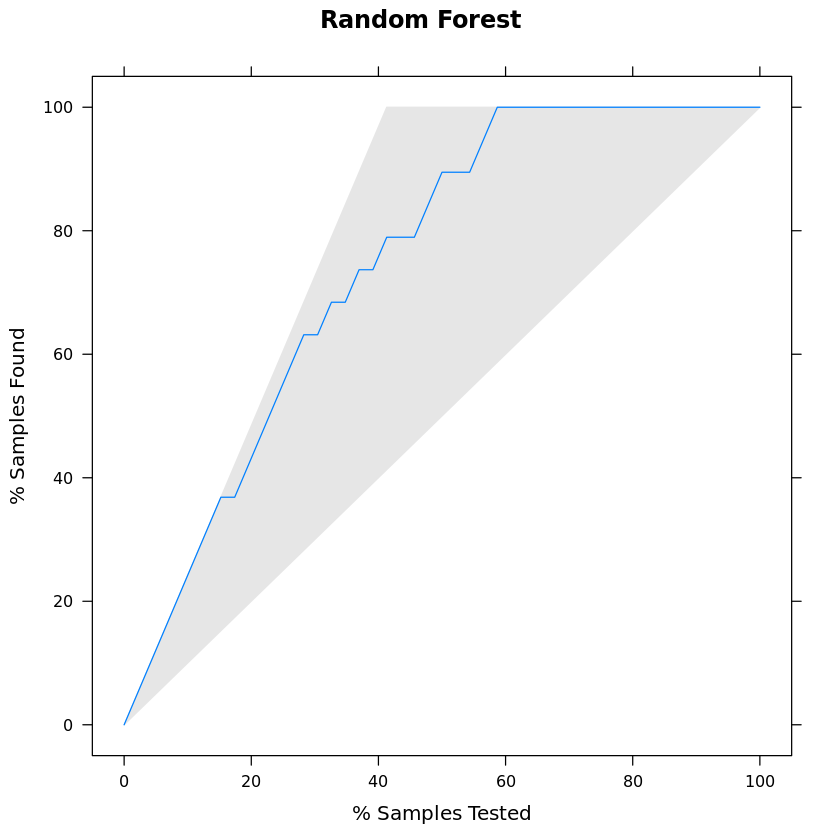

In [40]:
# Full dataset
train_rf(training, validate, verbose=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 43  0
         1  0 25
                                             
               Accuracy : 1                  
                 95% CI : (0.9472, 1)        
    No Information Rate : 0.6324             
    P-Value [Acc > NIR] : 0.00000000000002919
                                             
                  Kappa : 1                  
                                             
 Mcnemar's Test P-Value : NA                 
                                             
            Sensitivity : 1.0000             
            Specificity : 1.0000             
         Pos Pred Value : 1.0000             
         Neg Pred Value : 1.0000             
             Prevalence : 0.6324             
         Detection Rate : 0.6324             
   Detection Prevalence : 0.6324             
      Balanced Accuracy : 1.0000             
                                             
       'Positive' Clas

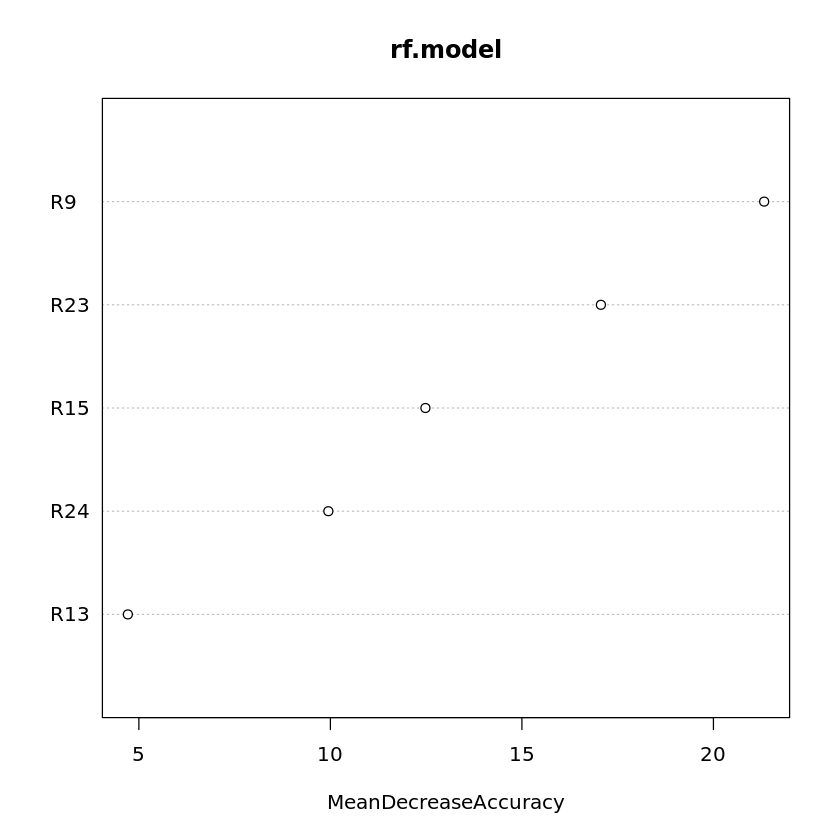


Call:
 randomForest(formula = D ~ ., data = training, ntree = 500, mtry = 4,      nodeize = 5, importance = TRUE, norm.votes = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 20.59%
Confusion matrix:
   0  1 class.error
0 37  6   0.1395349
1  8 17   0.3200000

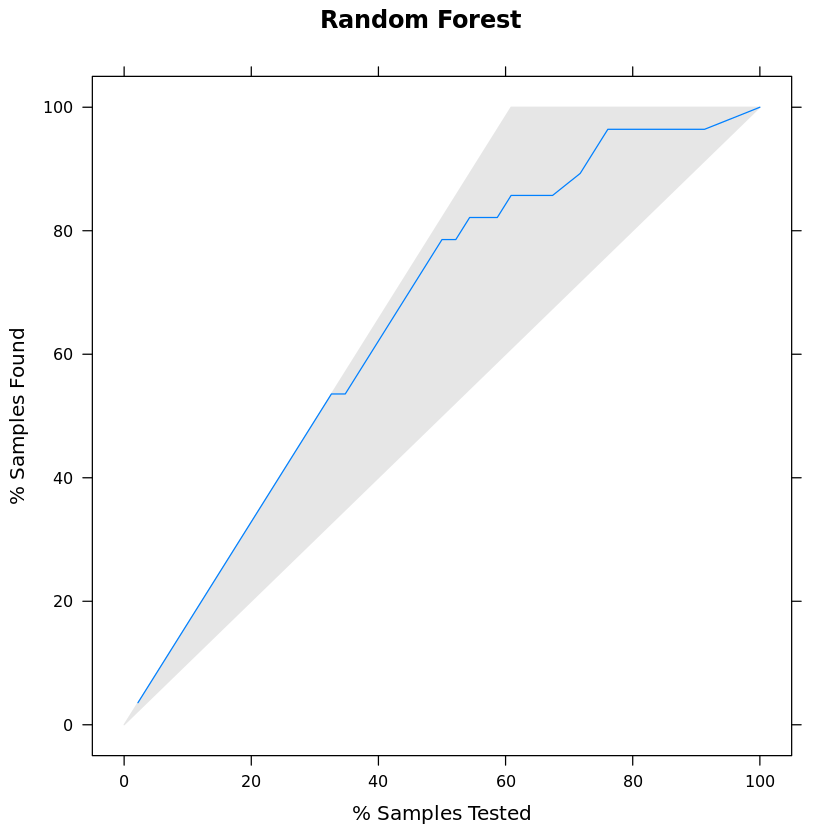

In [41]:
# Reduced dataset
train_rf(training.reduced, validate.reduced, verbose=TRUE)

# Boost
- Thought: Overfitting when using all variables
- Thought: Still overfitting when using reduced variables (need to tune)

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | 1.0   | 0.7609   | 7    | 4    |
| Reduced | 1.0   | 0.8043   | 1    | 8    |

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  0
         1  0 34
                                               
               Accuracy : 1                    
                 95% CI : (0.9472, 1)          
    No Information Rate : 0.5                  
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 1                    
                                               
 Mcnemar's Test P-Value : NA                   
                                               
            Sensitivity : 1.0                  
            Specificity : 1.0                  
         Pos Pred Value : 1.0                  
         Neg Pred Value : 1.0                  
             Prevalence : 0.5                  
         Detection Rate : 0.5                  
   Detection Prevalence : 0.5                  
      Balanced Accuracy : 1.0                  
                                

$formula
D ~ .
<environment: 0x560aaa190ed0>

$trees
$trees[[1]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 34 0 (0.5000000 0.5000000)  
  2) R24< 0.4246032 29  0 0 (1.0000000 0.0000000) *
  3) R24>=0.4246032 39  5 1 (0.1282051 0.8717949)  
    6) R9< 0.2231121 7  2 0 (0.7142857 0.2857143) *
    7) R9>=0.2231121 32  0 1 (0.0000000 1.0000000) *

$trees[[2]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 30 0 (0.5588235 0.4411765)  
  2) R13< 0.6704545 22  0 0 (1.0000000 0.0000000) *
  3) R13>=0.6704545 46 16 1 (0.3478261 0.6521739)  
    6) R10>=0.3772727 15  4 0 (0.7333333 0.2666667) *
    7) R10< 0.3772727 31  5 1 (0.1612903 0.8387097) *

$trees[[3]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 68 29 1 (0.4264706 0.5735294)  
   2) R18< 0.4166667 24  3 0 (0.8750000 0.1250000) *
   3) R18>=0.4166667 44  8 1 (0.1818182 0.8181818)  
     6) R21< 0.3012618 22  8 1 (0

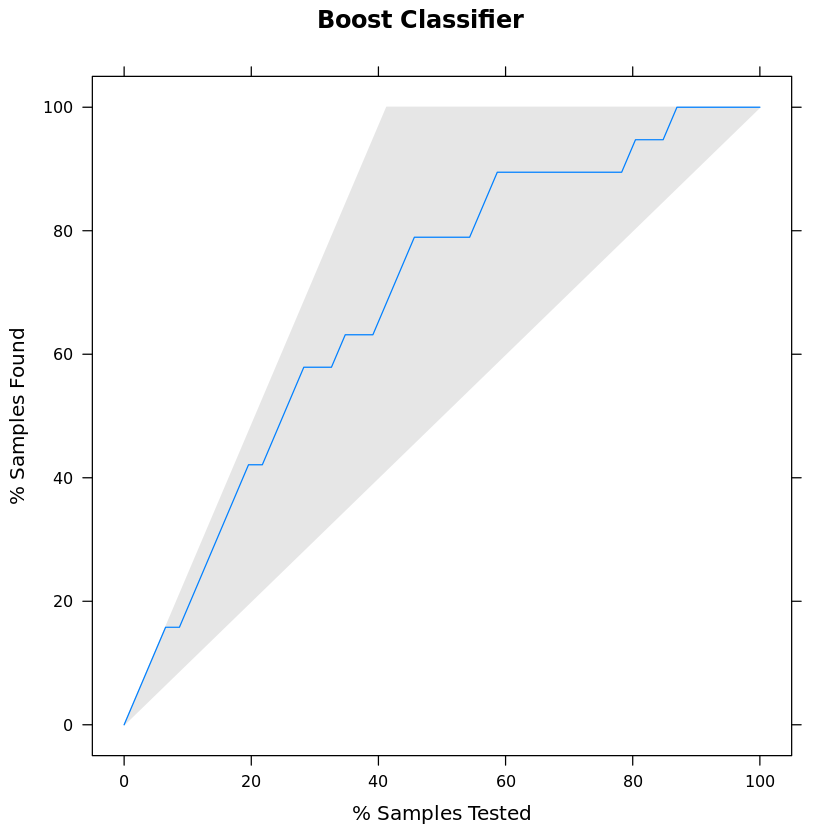

In [42]:
# Full Dataset
train_boost(training, validate, verbose=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 43  0
         1  0 25
                                             
               Accuracy : 1                  
                 95% CI : (0.9472, 1)        
    No Information Rate : 0.6324             
    P-Value [Acc > NIR] : 0.00000000000002919
                                             
                  Kappa : 1                  
                                             
 Mcnemar's Test P-Value : NA                 
                                             
            Sensitivity : 1.0000             
            Specificity : 1.0000             
         Pos Pred Value : 1.0000             
         Neg Pred Value : 1.0000             
             Prevalence : 0.6324             
         Detection Rate : 0.6324             
   Detection Prevalence : 0.6324             
      Balanced Accuracy : 1.0000             
                                             
       'Positive' Clas

$formula
D ~ .
<environment: 0x560aa5a3df48>

$trees
$trees[[1]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 27 0 (0.60294118 0.39705882)  
  2) R23< 0.6234568 38  3 0 (0.92105263 0.07894737) *
  3) R23>=0.6234568 30  6 1 (0.20000000 0.80000000) *

$trees[[2]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 26 0 (0.6176471 0.3823529)  
  2) R9< 0.312357 46  9 0 (0.8043478 0.1956522)  
    4) R23< 0.6481481 39  4 0 (0.8974359 0.1025641) *
    5) R23>=0.6481481 7  2 1 (0.2857143 0.7142857) *
  3) R9>=0.312357 22  5 1 (0.2272727 0.7727273)  
    6) R15< 0.5520833 8  3 0 (0.6250000 0.3750000) *
    7) R15>=0.5520833 14  0 1 (0.0000000 1.0000000) *

$trees[[3]]
n= 68 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 68 31 0 (0.5441176 0.4558824)  
  2) R9< 0.3100686 37  4 0 (0.8918919 0.1081081) *
  3) R9>=0.3100686 31  4 1 (0.1290323 0.8709677) *

$trees[[4]]
n= 68 

node), split, 

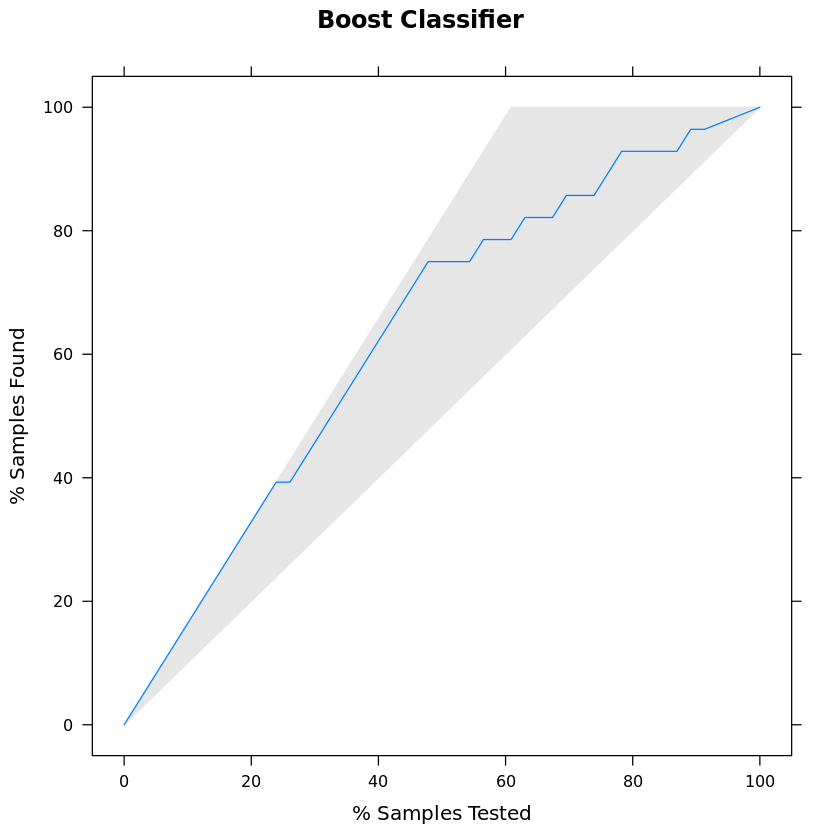

In [43]:
# Reduced dataset
train_boost(training.reduced, validate.reduced, verbose=TRUE)

# XGBoost

| Dataset | Training | Validate | V-FP | V-FN |
| :------ | :------: | :------: | :--: | :--: |
| Full    | N/A   | 0.6957   | 6    | 8    |
| Reduced | N/A   | 0.6957   | 9    | 5    |

[1]	train-rmse:0.813379 
[2]	train-rmse:0.593693 
[3]	train-rmse:0.435173 
[4]	train-rmse:0.322824 
[5]	train-rmse:0.237880 
[6]	train-rmse:0.176474 
[7]	train-rmse:0.132107 
[8]	train-rmse:0.100155 
[9]	train-rmse:0.077829 
[10]	train-rmse:0.060920 
[11]	train-rmse:0.048308 
[12]	train-rmse:0.038799 
[13]	train-rmse:0.031610 
[14]	train-rmse:0.026222 
[15]	train-rmse:0.021496 
[16]	train-rmse:0.017510 
[17]	train-rmse:0.014424 
[18]	train-rmse:0.011979 
[19]	train-rmse:0.009885 
[20]	train-rmse:0.008249 
[21]	train-rmse:0.006909 
[22]	train-rmse:0.005771 
[23]	train-rmse:0.004868 
[24]	train-rmse:0.004065 
[25]	train-rmse:0.003443 
[26]	train-rmse:0.002922 
[27]	train-rmse:0.002474 
[28]	train-rmse:0.002070 
[29]	train-rmse:0.001756 
[30]	train-rmse:0.001497 
[31]	train-rmse:0.001275 
[32]	train-rmse:0.001092 
[33]	train-rmse:0.000948 
[34]	train-rmse:0.000831 
[35]	train-rmse:0.000740 
[36]	train-rmse:0.000711 
[37]	train-rmse:0.000690 
[38]	train-rmse:0.000674 
[39]	train-rmse:0.000

##### xgb.Booster
raw: 44.6 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max.depth = 6)
params (as set within xgb.train):
  max_depth = "6", silent = "1"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 24 
niter: 50
nfeatures : 24 
evaluation_log:
    iter train_rmse
       1   0.813379
       2   0.593693
---                
      49   0.000543
      50   0.000543

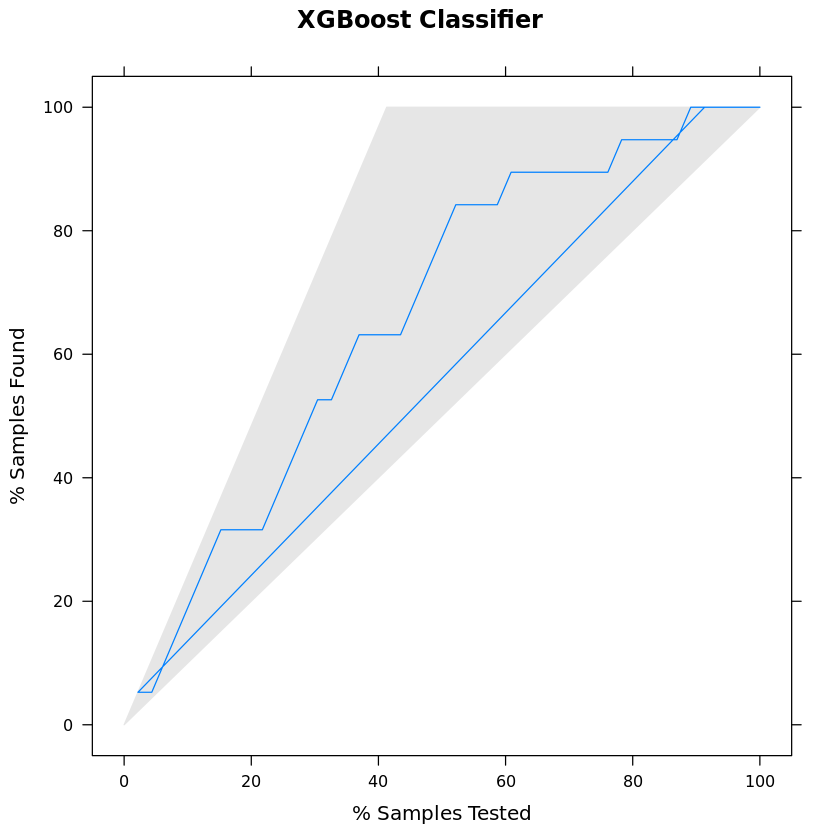

In [44]:
# Full dataset
train_xgboost(training, validate, verbose=TRUE)

In [ ]:
# Reduced dataset
train_xgboost(training.reduced, validate.reduced, verbose=TRUE)